In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import re
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

# C1

In [2]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C1_ionosphere.csv")
a

1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0    1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1    1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2    1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3    1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4    1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   
..  .. ..      ...       ...      ...      ...      ...       ...      ...   
345  1  0  0.83508   0.08298  0.73739 -0.14706  0.84349  -0.05567  0.90441   
346  1  0  0.95113   0.00419  0.95183 -0.02723  0.93438  -0.01920  0.94590   
347  1  0  0.94701  -0.00034  0.93207 -0.03227  0.95177  -0.03431  0.95584   
348  1  0  0.90608  -0.01657  0.98122 -0.01989  0.95691  -0.03646  0.85746   
349  1  0  0.84710   0.13533  0.73638 -0.06151  0.87873   0.08260  0.88928   

     0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.34090  0.42267  \
0   -0.04549  ...  -0.26569 -0.20468  -0.18401 -0.19040  -0.11593 -0.16626   
1    0.01198  ...  -0.40220  0.58984  -0.22145  0.43100  -0.17365  0.60436   
2    0.00000  ...   0.90695  0.51613   1.00000  1.00000  -0.20099  0.25682   
3   -0.16399  ...  -0.65158  0.13290  -0.53206  0.02431  -0.62197 -0.05707   
4    0.06637  ...  -0.01535 -0.03240   0.09223 -0.07859   0.00732  0.00000   
..       ...  ...       ...      ...       ...      ...       ...      ...   
345 -0.04622  ...  -0.04202  0.83479   0.00123  1.00000   0.12815  0.86660   
346  0.01606  ...   0.01361  0.93522   0.04925  0.93159   0.08168  0.94066   
347  0.02446  ...   0.03193  0.92489   0.02542  0.92120   0.02242  0.92459   
348  0.00110  ...  -0.02099  0.89147  -0.07760  0.82983  -0.17238  0.96022   
349 -0.09139  ...  -0.15114  0.81147  -0.04822  0.78207  -0.00703  0.75747   

     -0.54487  0.18641  -0.45300  g  
0    -0.06288 -0.13738  -0.02447  b  
1    -0.24180  0.56045  -0.38238  g  
2     1.00000 -0.32382   1.00000  b  
3    -0.59573 -0.04608  -0.65697  g  
4     0.00000 -0.00039   0.12011  b  
..        ...      ...       ... ..  
345  -0.10714  0.90546  -0.04307  g  
346  -0.00035  0.91483   0.04712  g  
347   0.00442  0.92697  -0.00577  g  
348  -0.03757  0.87403  -0.16243  g  
349  -0.06678  0.85764  -0.06151  g  

[350 rows x 35 columns]

In [3]:
a['g'].value_counts()

g    224
b    126
Name: g, dtype: int64

In [4]:
x=a.drop('g',axis=1)
y=a['g']

In [5]:
z={"g":{'g':8,'b':11}}
a=a.replace(z)
print(a)

     1  0  0.99539  -0.05889  0.85243  0.02306  0.83398  -0.37708      1.1  \
0    1  0  1.00000  -0.18829  0.93035 -0.36156 -0.10868  -0.93597  1.00000   
1    1  0  1.00000  -0.03365  1.00000  0.00485  1.00000  -0.12062  0.88965   
2    1  0  1.00000  -0.45161  1.00000  1.00000  0.71216  -1.00000  0.00000   
3    1  0  1.00000  -0.02401  0.94140  0.06531  0.92106  -0.23255  0.77152   
4    1  0  0.02337  -0.00592 -0.09924 -0.11949 -0.00763  -0.11824  0.14706   
..  .. ..      ...       ...      ...      ...      ...       ...      ...   
345  1  0  0.83508   0.08298  0.73739 -0.14706  0.84349  -0.05567  0.90441   
346  1  0  0.95113   0.00419  0.95183 -0.02723  0.93438  -0.01920  0.94590   
347  1  0  0.94701  -0.00034  0.93207 -0.03227  0.95177  -0.03431  0.95584   
348  1  0  0.90608  -0.01657  0.98122 -0.01989  0.95691  -0.03646  0.85746   
349  1  0  0.84710   0.13533  0.73638 -0.06151  0.87873   0.08260  0.88928   

     0.03760  ...  -0.51171  0.41078  -0.46168  0.21266  -0.340

In [6]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

In [7]:
m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [8]:
parameters={'max_depth':[1,2,3,15,5],
           'min_samples_leaf':[5,20,13,20,45],
           'n_estimators':[12,51,32,87,65]}

In [9]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 3, 15, 5],
                         'min_samples_leaf': [5, 20, 13, 20, 45],
                         'n_estimators': [12, 51, 32, 87, 65]},
             scoring='accuracy')

In [10]:
grid_search.best_score_

0.9233870967741935

In [11]:
rfc_best=grid_search.best_estimator_

[Text(2054.4545454545455, 2378.25, '0.83398 <= 0.034\ngini = 0.467\nsamples = 158\nvalue = [92, 156]\nclass = No'),
 Text(913.0909090909091, 1698.75, '0.36946 <= 0.04\ngini = 0.08\nsamples = 31\nvalue = [46, 2]\nclass = Yes'),
 Text(456.54545454545456, 1019.25, 'gini = 0.0\nsamples = 22\nvalue = [34, 0]\nclass = Yes'),
 Text(1369.6363636363637, 1019.25, 'gini = 0.245\nsamples = 9\nvalue = [12, 2]\nclass = Yes'),
 Text(3195.818181818182, 1698.75, '0.99539 <= 0.454\ngini = 0.354\nsamples = 127\nvalue = [46, 154]\nclass = No'),
 Text(2282.727272727273, 1019.25, '0.84356 <= 0.011\ngini = 0.278\nsamples = 20\nvalue = [25, 5]\nclass = Yes'),
 Text(1826.1818181818182, 339.75, 'gini = 0.463\nsamples = 9\nvalue = [7, 4]\nclass = Yes'),
 Text(2739.2727272727275, 339.75, 'gini = 0.1\nsamples = 11\nvalue = [18, 1]\nclass = Yes'),
 Text(4108.909090909091, 1019.25, '-0.47357 <= 0.944\ngini = 0.217\nsamples = 107\nvalue = [21, 149]\nclass = No'),
 Text(3652.3636363636365, 339.75, 'gini = 0.139\nsampl

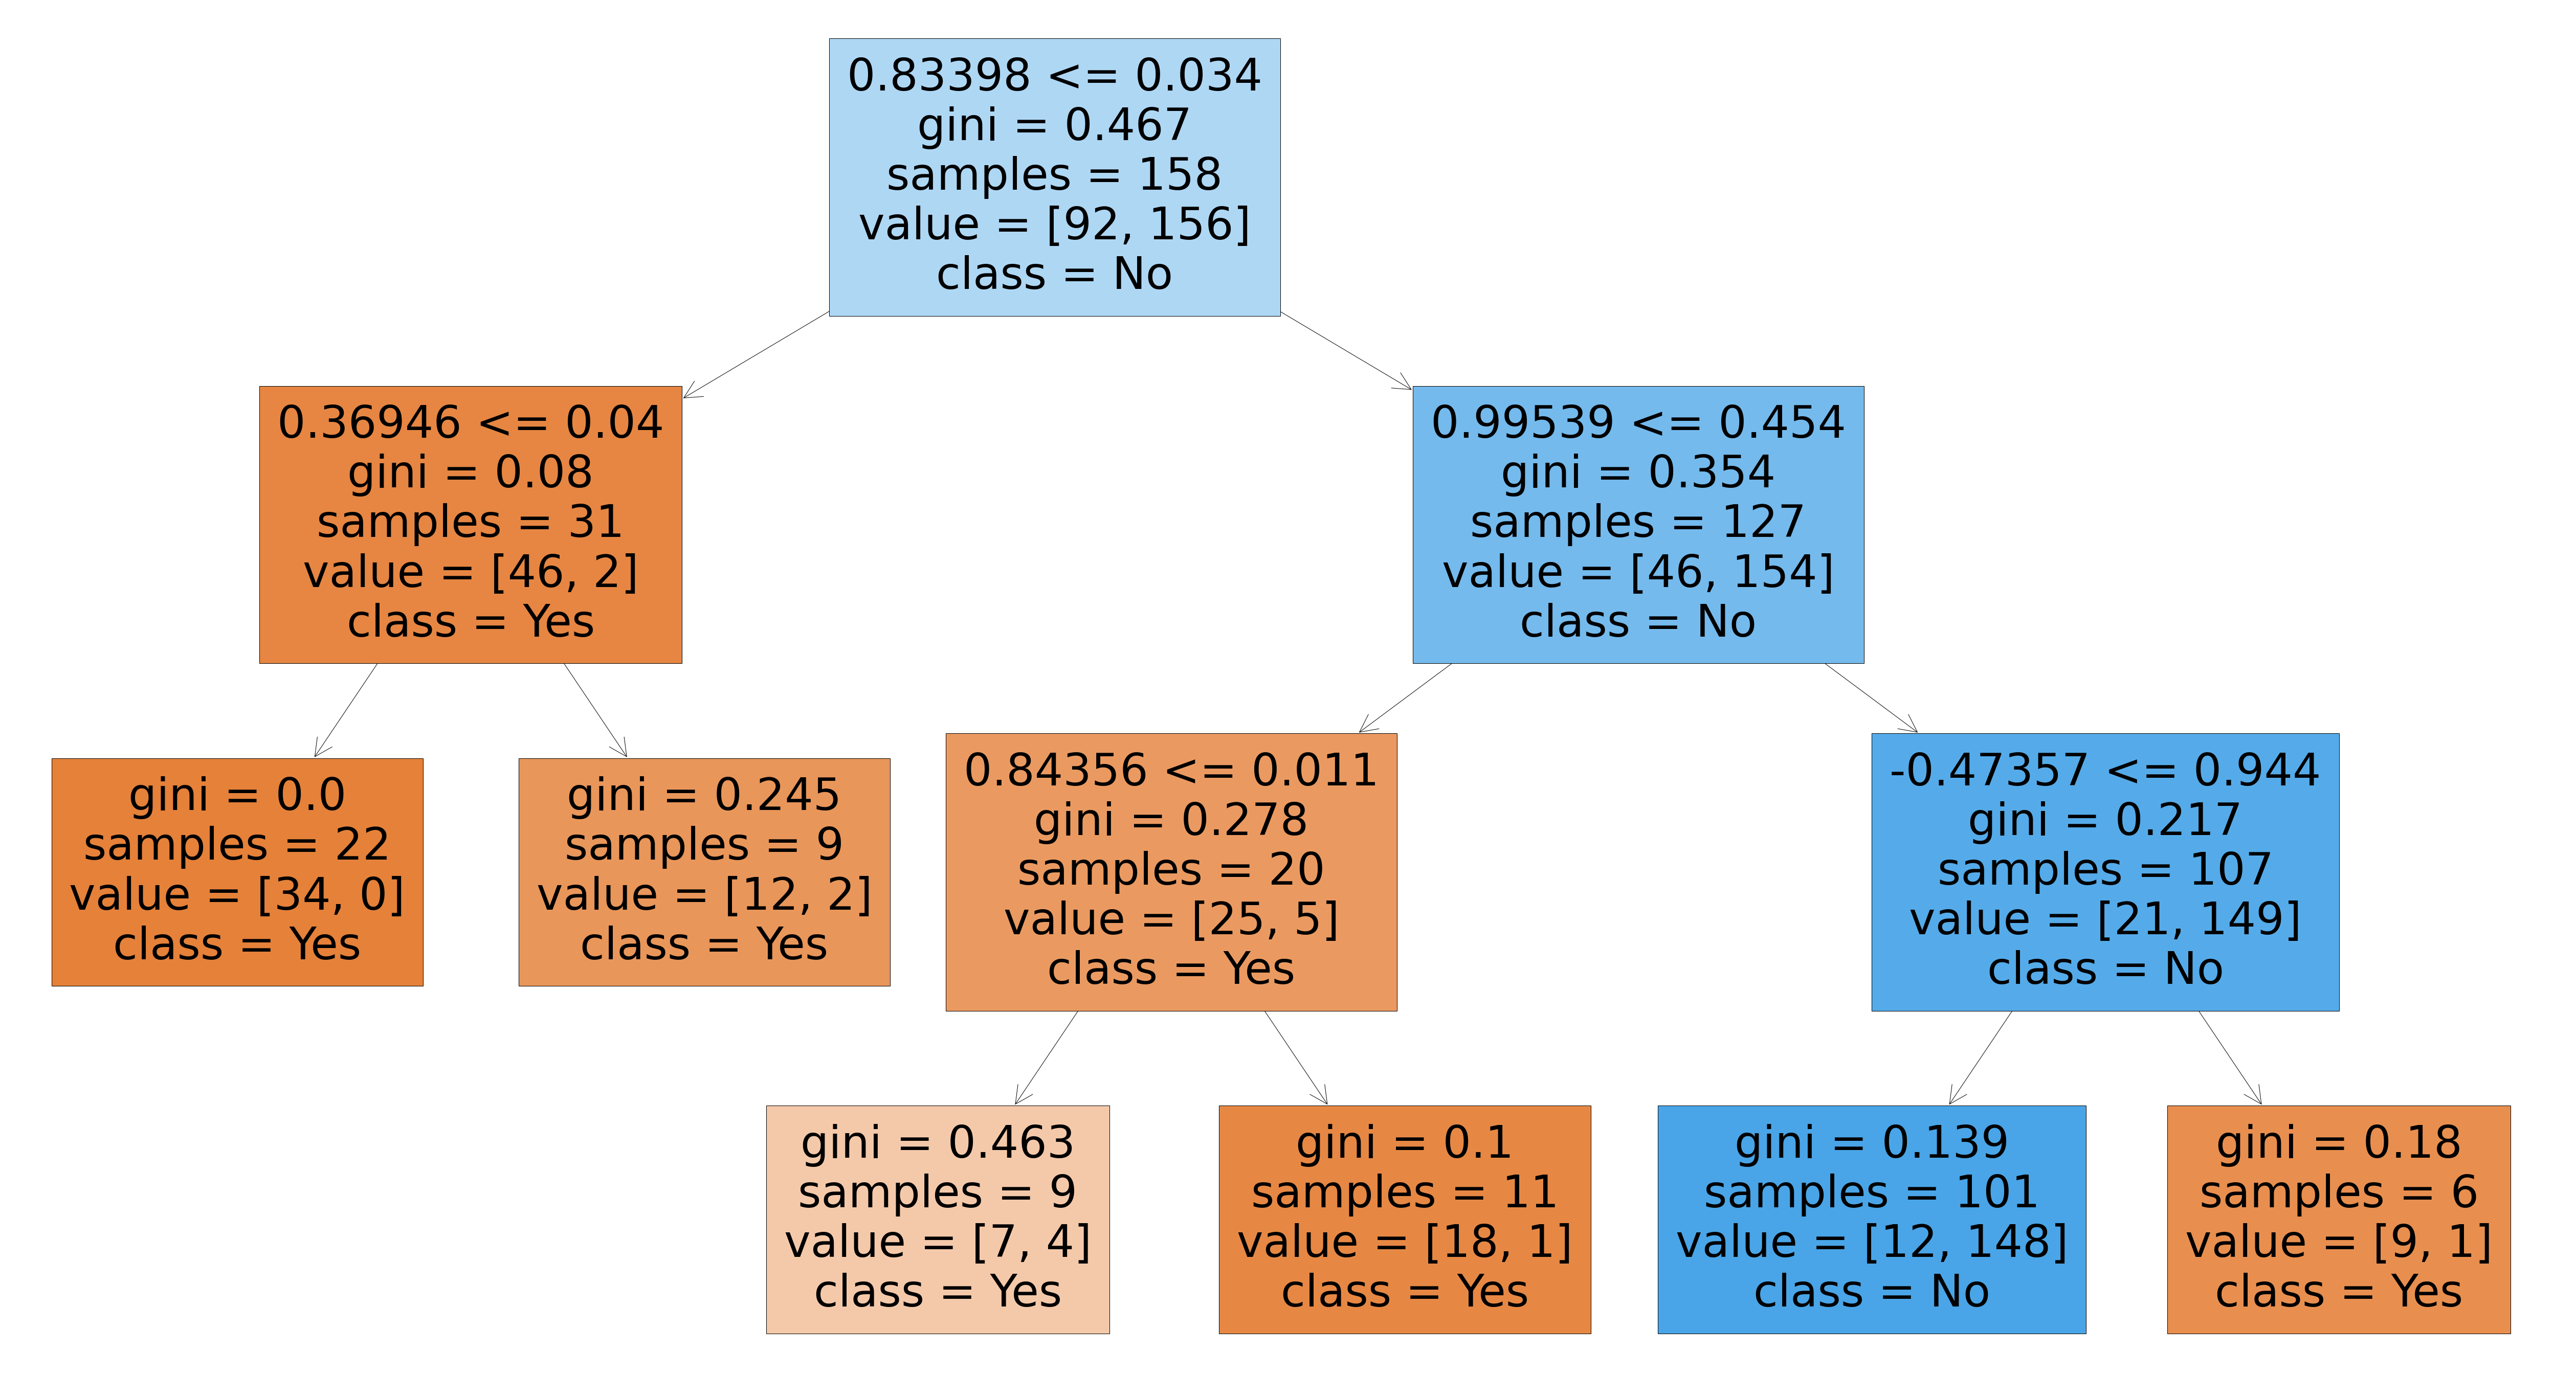

In [14]:
plt.figure(figsize=(90,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)

# C2

In [15]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C2_train.gender_submission 2.csv")
a

PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...    ...   
886                              Montvila, Rev. Juozas    male  27.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
888           Johnston, Miss. Catherine Helen "Carrie"  female   NaN      1   
889                              Behr, Mr. Karl Howell    male  26.0      0   
890                                Dooley, Mr. Patrick    male  32.0      0   

     Parch            Ticket     Fare Cabin Embarked  
0        0         A/5 21171   7.2500   NaN        S  
1        0          PC 17599  71.2833   C85        C  
2        0  STON/O2. 3101282   7.9250   NaN        S  
3        0            113803  53.1000  C123        S  
4        0            373450   8.0500   NaN        S  
..     ...               ...      ...   ...      ...  
886      0            211536  13.0000   NaN        S  
887      0            112053  30.0000   B42        S  
888      2        W./C. 6607  23.4500   NaN        S  
889      0            111369  30.0000  C148        C  
890      0            370376   7.7500   NaN        Q  

[891 rows x 12 columns]

In [16]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
b=a.dropna()
b

PassengerId  Survived  Pclass  \
1              2         1       1   
3              4         1       1   
6              7         0       1   
10            11         1       3   
11            12         1       1   
..           ...       ...     ...   
871          872         1       1   
872          873         0       1   
879          880         1       1   
887          888         1       1   
889          890         1       1   

                                                  Name     Sex   Age  SibSp  \
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
6                              McCarthy, Mr. Timothy J    male  54.0      0   
10                     Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                            Bonnell, Miss. Elizabeth  female  58.0      0   
..                                                 ...     ...   ...    ...   
871   Beckwith, Mrs. Richard Leonard (Sallie Monypeny)  female  47.0      1   
872                           Carlsson, Mr. Frans Olof    male  33.0      0   
879      Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
887                       Graham, Miss. Margaret Edith  female  19.0      0   
889                              Behr, Mr. Karl Howell    male  26.0      0   

     Parch    Ticket     Fare        Cabin Embarked  
1        0  PC 17599  71.2833          C85        C  
3        0    113803  53.1000         C123        S  
6        0     17463  51.8625          E46        S  
10       1   PP 9549  16.7000           G6        S  
11       0    113783  26.5500         C103        S  
..     ...       ...      ...          ...      ...  
871      1     11751  52.5542          D35        S  
872      0       695   5.0000  B51 B53 B55        S  
879      1     11767  83.1583          C50        C  
887      0    112053  30.0000          B42        S  
889      0    111369  30.0000         C148        C  

[183 rows x 12 columns]

In [18]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [21]:
c=b[['PassengerId','Survived','Pclass','SibSp','Parch','Embarked']]
c

PassengerId  Survived  Pclass  SibSp  Parch Embarked
1              2         1       1      1      0        C
3              4         1       1      1      0        S
6              7         0       1      0      0        S
10            11         1       3      1      1        S
11            12         1       1      0      0        S
..           ...       ...     ...    ...    ...      ...
871          872         1       1      1      1        S
872          873         0       1      0      0        S
879          880         1       1      0      1        C
887          888         1       1      0      0        S
889          890         1       1      0      0        C

[183 rows x 6 columns]

In [22]:
c['Embarked'].value_counts()

S    116
C     65
Q      2
Name: Embarked, dtype: int64

In [23]:
x=c.drop('Embarked',axis=1)
y=c['Embarked']

In [27]:
z={"Embarked":{'S':16,'C':11,'Q':32}}
c=c.replace(z)
print(c)

     PassengerId  Survived  Pclass  SibSp  Parch  Embarked
1              2         1       1      1      0        11
3              4         1       1      1      0        16
6              7         0       1      0      0        16
10            11         1       3      1      1        16
11            12         1       1      0      0        16
..           ...       ...     ...    ...    ...       ...
871          872         1       1      1      1        16
872          873         0       1      0      0        16
879          880         1       1      0      1        11
887          888         1       1      0      0        16
889          890         1       1      0      0        11

[183 rows x 6 columns]


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

In [29]:
m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [31]:
parameters={'max_depth':[1,2,8,15,5],
           'min_samples_leaf':[5,20,13,20,45],
           'n_estimators':[12,98,4,78,34]}

In [32]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 2, 8, 15, 5],
                         'min_samples_leaf': [5, 20, 13, 20, 45],
                         'n_estimators': [12, 98, 4, 78, 34]},
             scoring='accuracy')

In [33]:
grid_search.best_score_

0.6745192307692307

In [34]:
rfc_best=grid_search.best_estimator_

[Text(3228.4285714285716, 2491.5, 'Pclass <= 1.5\ngini = 0.484\nsamples = 76\nvalue = [53, 76]\nclass = No'),
 Text(2869.714285714286, 2038.5, 'Parch <= 0.5\ngini = 0.498\nsamples = 65\nvalue = [53, 60]\nclass = No'),
 Text(1793.5714285714287, 1585.5, 'Survived <= 0.5\ngini = 0.497\nsamples = 47\nvalue = [39, 46]\nclass = No'),
 Text(717.4285714285714, 1132.5, 'PassengerId <= 298.0\ngini = 0.417\nsamples = 15\nvalue = [8, 19]\nclass = No'),
 Text(358.7142857142857, 679.5, 'gini = 0.408\nsamples = 5\nvalue = [5, 2]\nclass = Yes'),
 Text(1076.142857142857, 679.5, 'PassengerId <= 560.5\ngini = 0.255\nsamples = 10\nvalue = [3, 17]\nclass = No'),
 Text(717.4285714285714, 226.5, 'gini = 0.0\nsamples = 5\nvalue = [0, 9]\nclass = No'),
 Text(1434.857142857143, 226.5, 'gini = 0.397\nsamples = 5\nvalue = [3, 8]\nclass = No'),
 Text(2869.714285714286, 1132.5, 'PassengerId <= 701.5\ngini = 0.498\nsamples = 32\nvalue = [31, 27]\nclass = Yes'),
 Text(2511.0, 679.5, 'PassengerId <= 539.0\ngini = 0.48

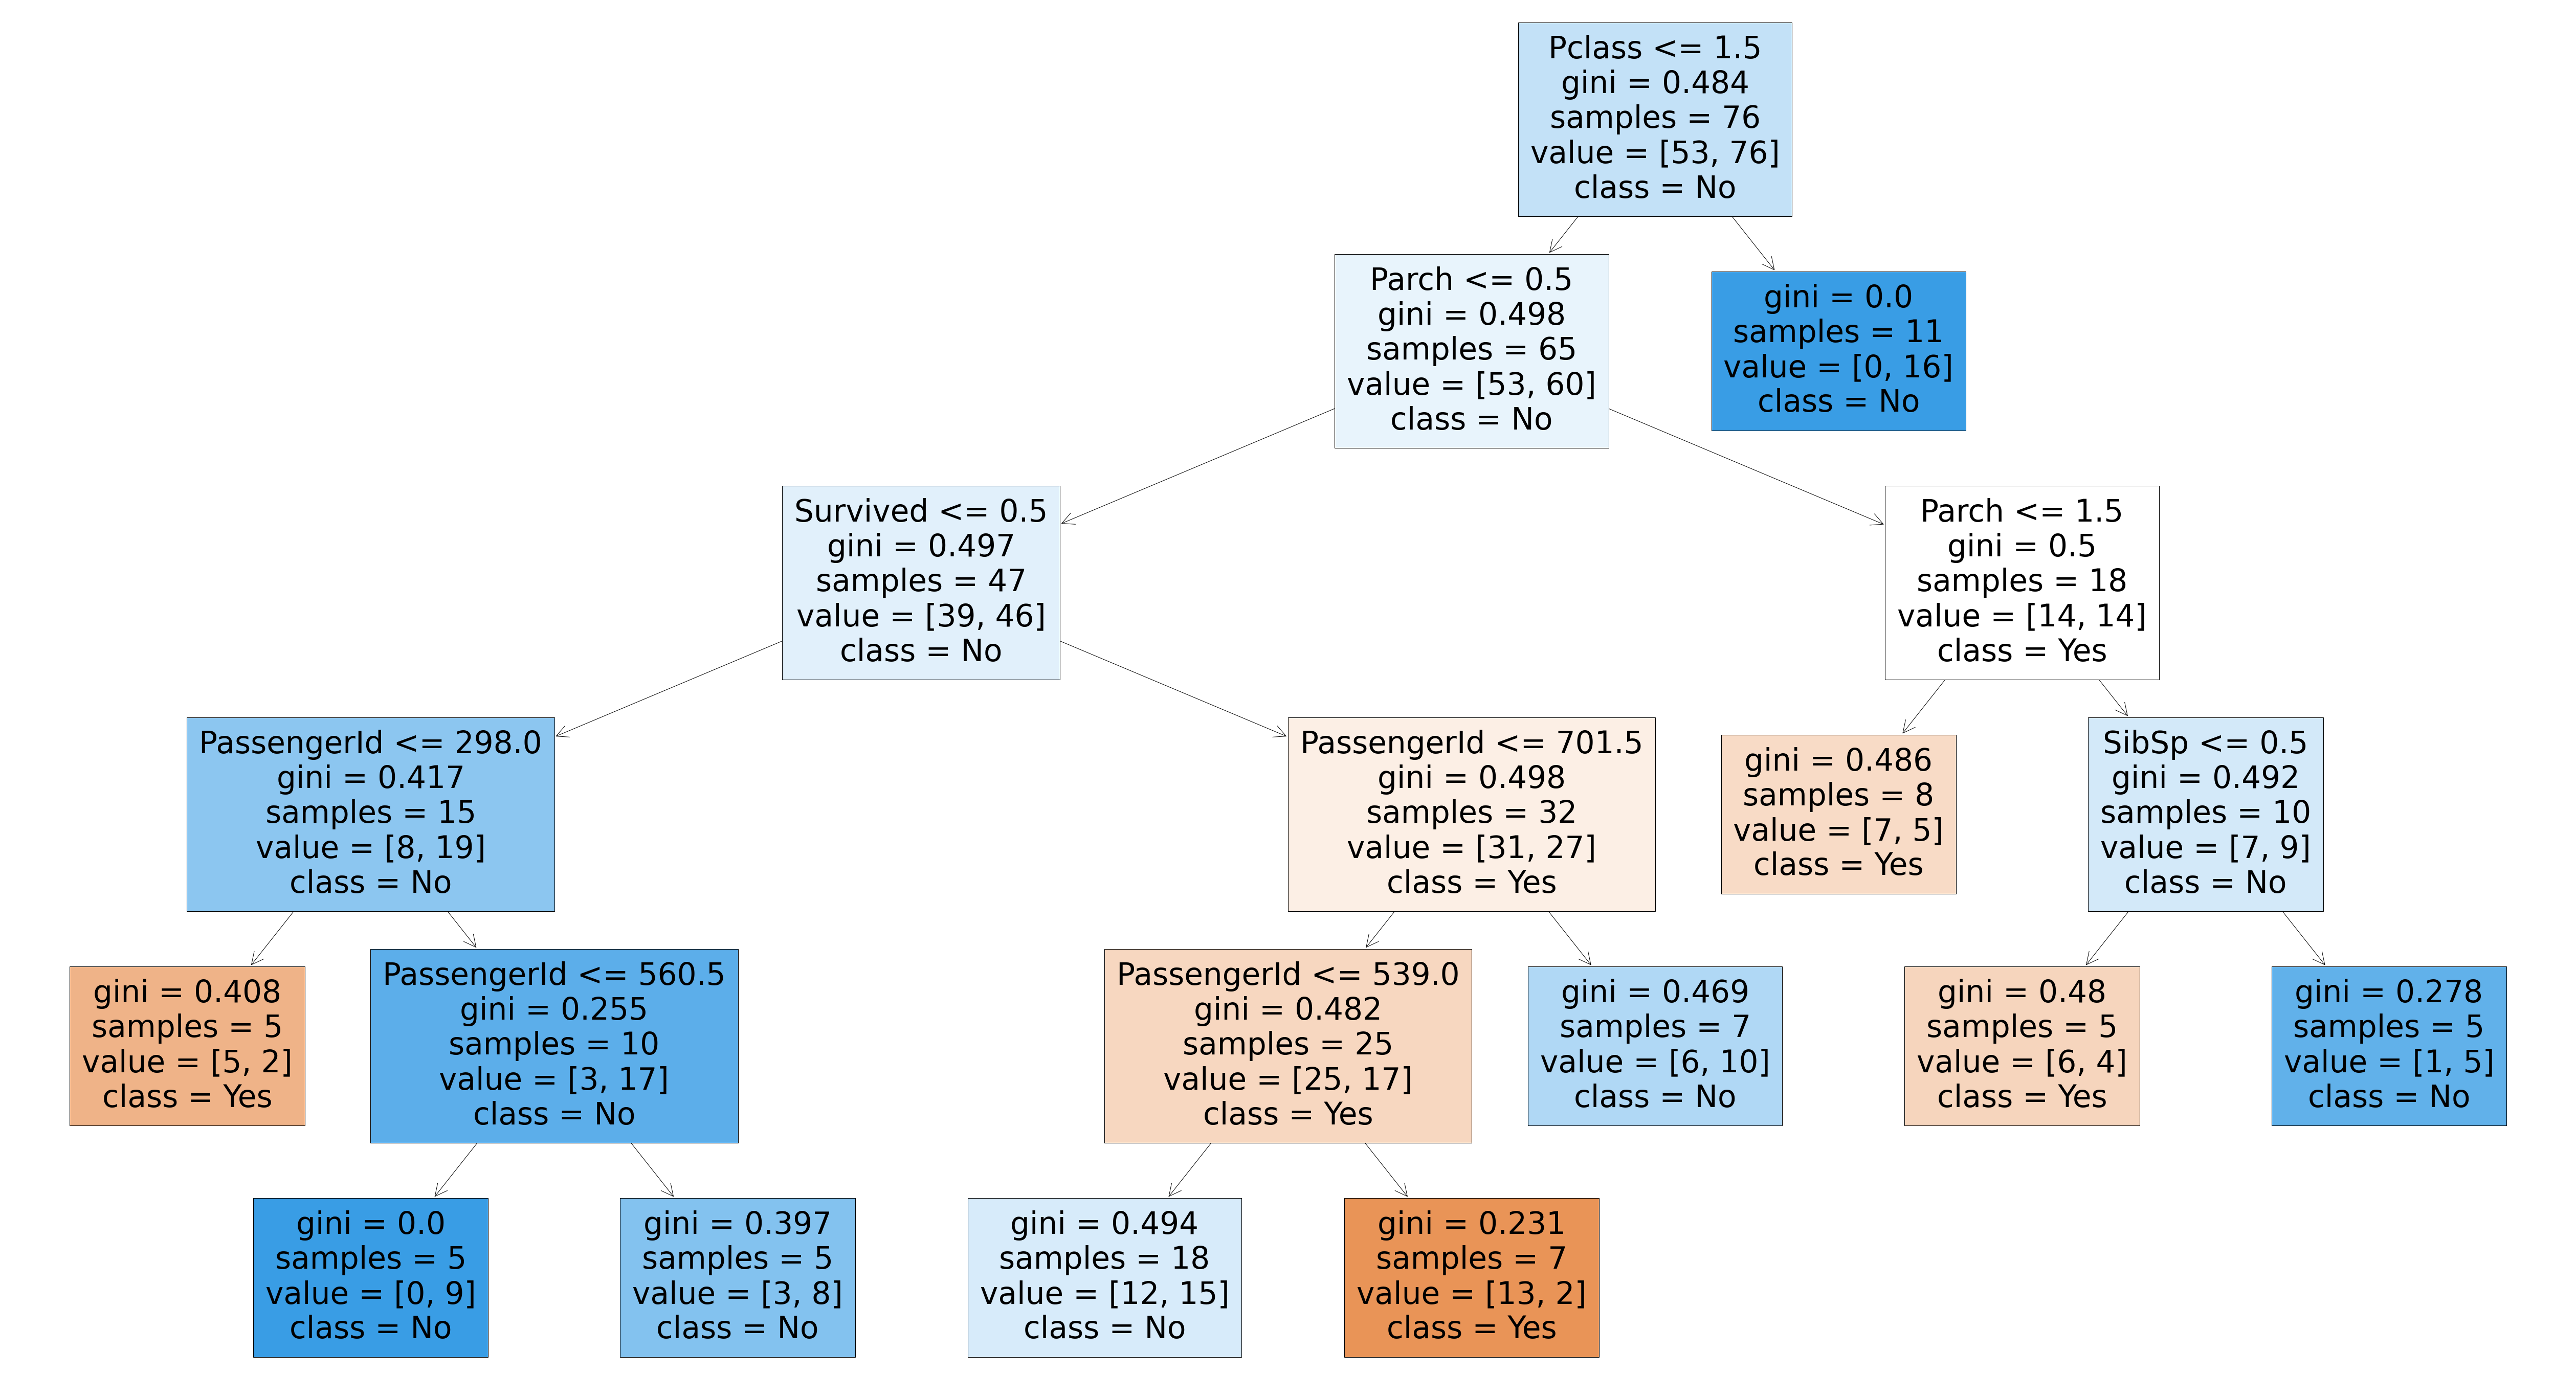

In [35]:
plt.figure(figsize=(90,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)

# C3

In [36]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C3_bot_detection_data.csv")
a

User ID         Username  \
0       132131            flong   
1       289683   hinesstephanie   
2       779715       roberttran   
3       696168           pmason   
4       704441           noah87   
...        ...              ...   
49995   491196            uberg   
49996   739297     jessicamunoz   
49997   674475   lynncunningham   
49998   167081  richardthompson   
49999   311204         daniel29   

                                                   Tweet  Retweet Count  \
0      Station activity person against natural majori...             85   
1      Authority research natural life material staff...             55   
2      Manage whose quickly especially foot none to g...              6   
3      Just cover eight opportunity strong policy which.             54   
4                          Animal sign six data good or.             26   
...                                                  ...            ...   
49995  Want but put card direction know miss former h...             64   
49996  Provide whole maybe agree church respond most ...             18   
49997  Bring different everyone international capital...             43   
49998  Than about single generation itself seek sell ...             45   
49999  Here morning class various room human true bec...             91   

       Mention Count  Follower Count  Verified  Bot Label            Location  \
0                  1            2353     False          1           Adkinston   
1                  5            9617      True          0          Sanderston   
2                  2            4363      True          0        Harrisonfurt   
3                  5            2242      True          1        Martinezberg   
4                  3            8438     False          1        Camachoville   
...              ...             ...       ...        ...                 ...   
49995              0            9911      True          1  Lake Kimberlyburgh   
49996              5            9900     False          1           Greenbury   
49997              3            6313      True          1         Deborahfort   
49998              1            6343     False          0         Stephenside   
49999              4            4006     False          0           Novakberg   

                Created At                         Hashtags  
0      2020-05-11 15:29:50                              NaN  
1      2022-11-26 05:18:10                        both live  
2      2022-08-08 03:16:54                      phone ahead  
3      2021-08-14 22:27:05               ever quickly new I  
4      2020-04-13 21:24:21                  foreign mention  
...                    ...                              ...  
49995  2023-04-20 11:06:26  teach quality ten education any  
49996  2022-10-18 03:57:35           add walk among believe  
49997  2020-07-08 03:54:08          onto admit artist first  
49998  2022-03-22 12:13:44                             star  
49999  2022-12-03 06:11:07                             home  

[50000 rows x 11 columns]

In [37]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         50000 non-null  int64 
 1   Username        50000 non-null  object
 2   Tweet           50000 non-null  object
 3   Retweet Count   50000 non-null  int64 
 4   Mention Count   50000 non-null  int64 
 5   Follower Count  50000 non-null  int64 
 6   Verified        50000 non-null  bool  
 7   Bot Label       50000 non-null  int64 
 8   Location        50000 non-null  object
 9   Created At      50000 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.9+ MB


In [38]:
b=a.dropna()
b

User ID         Username  \
1       289683   hinesstephanie   
2       779715       roberttran   
3       696168           pmason   
4       704441           noah87   
5       570928          james00   
...        ...              ...   
49995   491196            uberg   
49996   739297     jessicamunoz   
49997   674475   lynncunningham   
49998   167081  richardthompson   
49999   311204         daniel29   

                                                   Tweet  Retweet Count  \
1      Authority research natural life material staff...             55   
2      Manage whose quickly especially foot none to g...              6   
3      Just cover eight opportunity strong policy which.             54   
4                          Animal sign six data good or.             26   
5      See wonder travel this suffer less yard office...             41   
...                                                  ...            ...   
49995  Want but put card direction know miss former h...             64   
49996  Provide whole maybe agree church respond most ...             18   
49997  Bring different everyone international capital...             43   
49998  Than about single generation itself seek sell ...             45   
49999  Here morning class various room human true bec...             91   

       Mention Count  Follower Count  Verified  Bot Label            Location  \
1                  5            9617      True          0          Sanderston   
2                  2            4363      True          0        Harrisonfurt   
3                  5            2242      True          1        Martinezberg   
4                  3            8438     False          1        Camachoville   
5                  4            3792      True          1       West Cheyenne   
...              ...             ...       ...        ...                 ...   
49995              0            9911      True          1  Lake Kimberlyburgh   
49996              5            9900     False          1           Greenbury   
49997              3            6313      True          1         Deborahfort   
49998              1            6343     False          0         Stephenside   
49999              4            4006     False          0           Novakberg   

                Created At                           Hashtags  
1      2022-11-26 05:18:10                          both live  
2      2022-08-08 03:16:54                        phone ahead  
3      2021-08-14 22:27:05                 ever quickly new I  
4      2020-04-13 21:24:21                    foreign mention  
5      2023-05-07 22:24:47  anyone respond perhaps market run  
...                    ...                                ...  
49995  2023-04-20 11:06:26    teach quality ten education any  
49996  2022-10-18 03:57:35             add walk among believe  
49997  2020-07-08 03:54:08            onto admit artist first  
49998  2022-03-22 12:13:44                               star  
49999  2022-12-03 06:11:07                               home  

[41659 rows x 11 columns]

In [39]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41659 entries, 1 to 49999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   User ID         41659 non-null  int64 
 1   Username        41659 non-null  object
 2   Tweet           41659 non-null  object
 3   Retweet Count   41659 non-null  int64 
 4   Mention Count   41659 non-null  int64 
 5   Follower Count  41659 non-null  int64 
 6   Verified        41659 non-null  bool  
 7   Bot Label       41659 non-null  int64 
 8   Location        41659 non-null  object
 9   Created At      41659 non-null  object
 10  Hashtags        41659 non-null  object
dtypes: bool(1), int64(5), object(5)
memory usage: 3.5+ MB


In [42]:
c=b[['User ID','Mention Count','Follower Count','Bot Label','Verified']]
c

User ID  Mention Count  Follower Count  Bot Label  Verified
1       289683              5            9617          0      True
2       779715              2            4363          0      True
3       696168              5            2242          1      True
4       704441              3            8438          1     False
5       570928              4            3792          1      True
...        ...            ...             ...        ...       ...
49995   491196              0            9911          1      True
49996   739297              5            9900          1     False
49997   674475              3            6313          1      True
49998   167081              1            6343          0     False
49999   311204              4            4006          0     False

[41659 rows x 5 columns]

In [43]:
c['Verified'].value_counts()

True     20845
False    20814
Name: Verified, dtype: int64

In [44]:
x=c.drop('Verified',axis=1)
y=c['Verified']

In [45]:
z={"Embarked":{'True':16,'False':11}}
c=c.replace(z)
print(c)

       User ID  Mention Count  Follower Count  Bot Label  Verified
1       289683              5            9617          0      True
2       779715              2            4363          0      True
3       696168              5            2242          1      True
4       704441              3            8438          1     False
5       570928              4            3792          1      True
...        ...            ...             ...        ...       ...
49995   491196              0            9911          1      True
49996   739297              5            9900          1     False
49997   674475              3            6313          1      True
49998   167081              1            6343          0     False
49999   311204              4            4006          0     False

[41659 rows x 5 columns]


In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

In [47]:
m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [48]:
parameters={'max_depth':[65,98,8,15,58],
           'min_samples_leaf':[45,84,13,20,45],
           'n_estimators':[12,27,65,78,33]}

In [49]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [65, 98, 8, 15, 58],
                         'min_samples_leaf': [45, 84, 13, 20, 45],
                         'n_estimators': [12, 27, 65, 78, 33]},
             scoring='accuracy')

In [50]:
grid_search.best_score_

0.5083682201311522

In [51]:
rfc_best=grid_search.best_estimator_

[Text(3574.6875, 2491.5, 'male <= 0.5\ngini = 0.255\nsamples = 1922\nvalue = [2556, 452]\nclass = Yes'),
 Text(2266.875, 2038.5, 'age <= 58.5\ngini = 0.22\nsamples = 1106\nvalue = [1514, 218]\nclass = Yes'),
 Text(1395.0, 1585.5, 'age <= 44.5\ngini = 0.153\nsamples = 888\nvalue = [1272, 116]\nclass = Yes'),
 Text(697.5, 1132.5, 'currentSmoker <= 0.5\ngini = 0.092\nsamples = 344\nvalue = [514, 26]\nclass = Yes'),
 Text(348.75, 679.5, 'gini = 0.017\nsamples = 146\nvalue = [227, 2]\nclass = Yes'),
 Text(1046.25, 679.5, 'gini = 0.142\nsamples = 198\nvalue = [287, 24]\nclass = Yes'),
 Text(2092.5, 1132.5, 'prevalentHyp <= 0.5\ngini = 0.19\nsamples = 544\nvalue = [758, 90]\nclass = Yes'),
 Text(1743.75, 679.5, 'gini = 0.176\nsamples = 368\nvalue = [535, 58]\nclass = Yes'),
 Text(2441.25, 679.5, 'currentSmoker <= 0.5\ngini = 0.219\nsamples = 176\nvalue = [223, 32]\nclass = Yes'),
 Text(2092.5, 226.5, 'gini = 0.241\nsamples = 117\nvalue = [141, 23]\nclass = Yes'),
 Text(2790.0, 226.5, 'gini = 

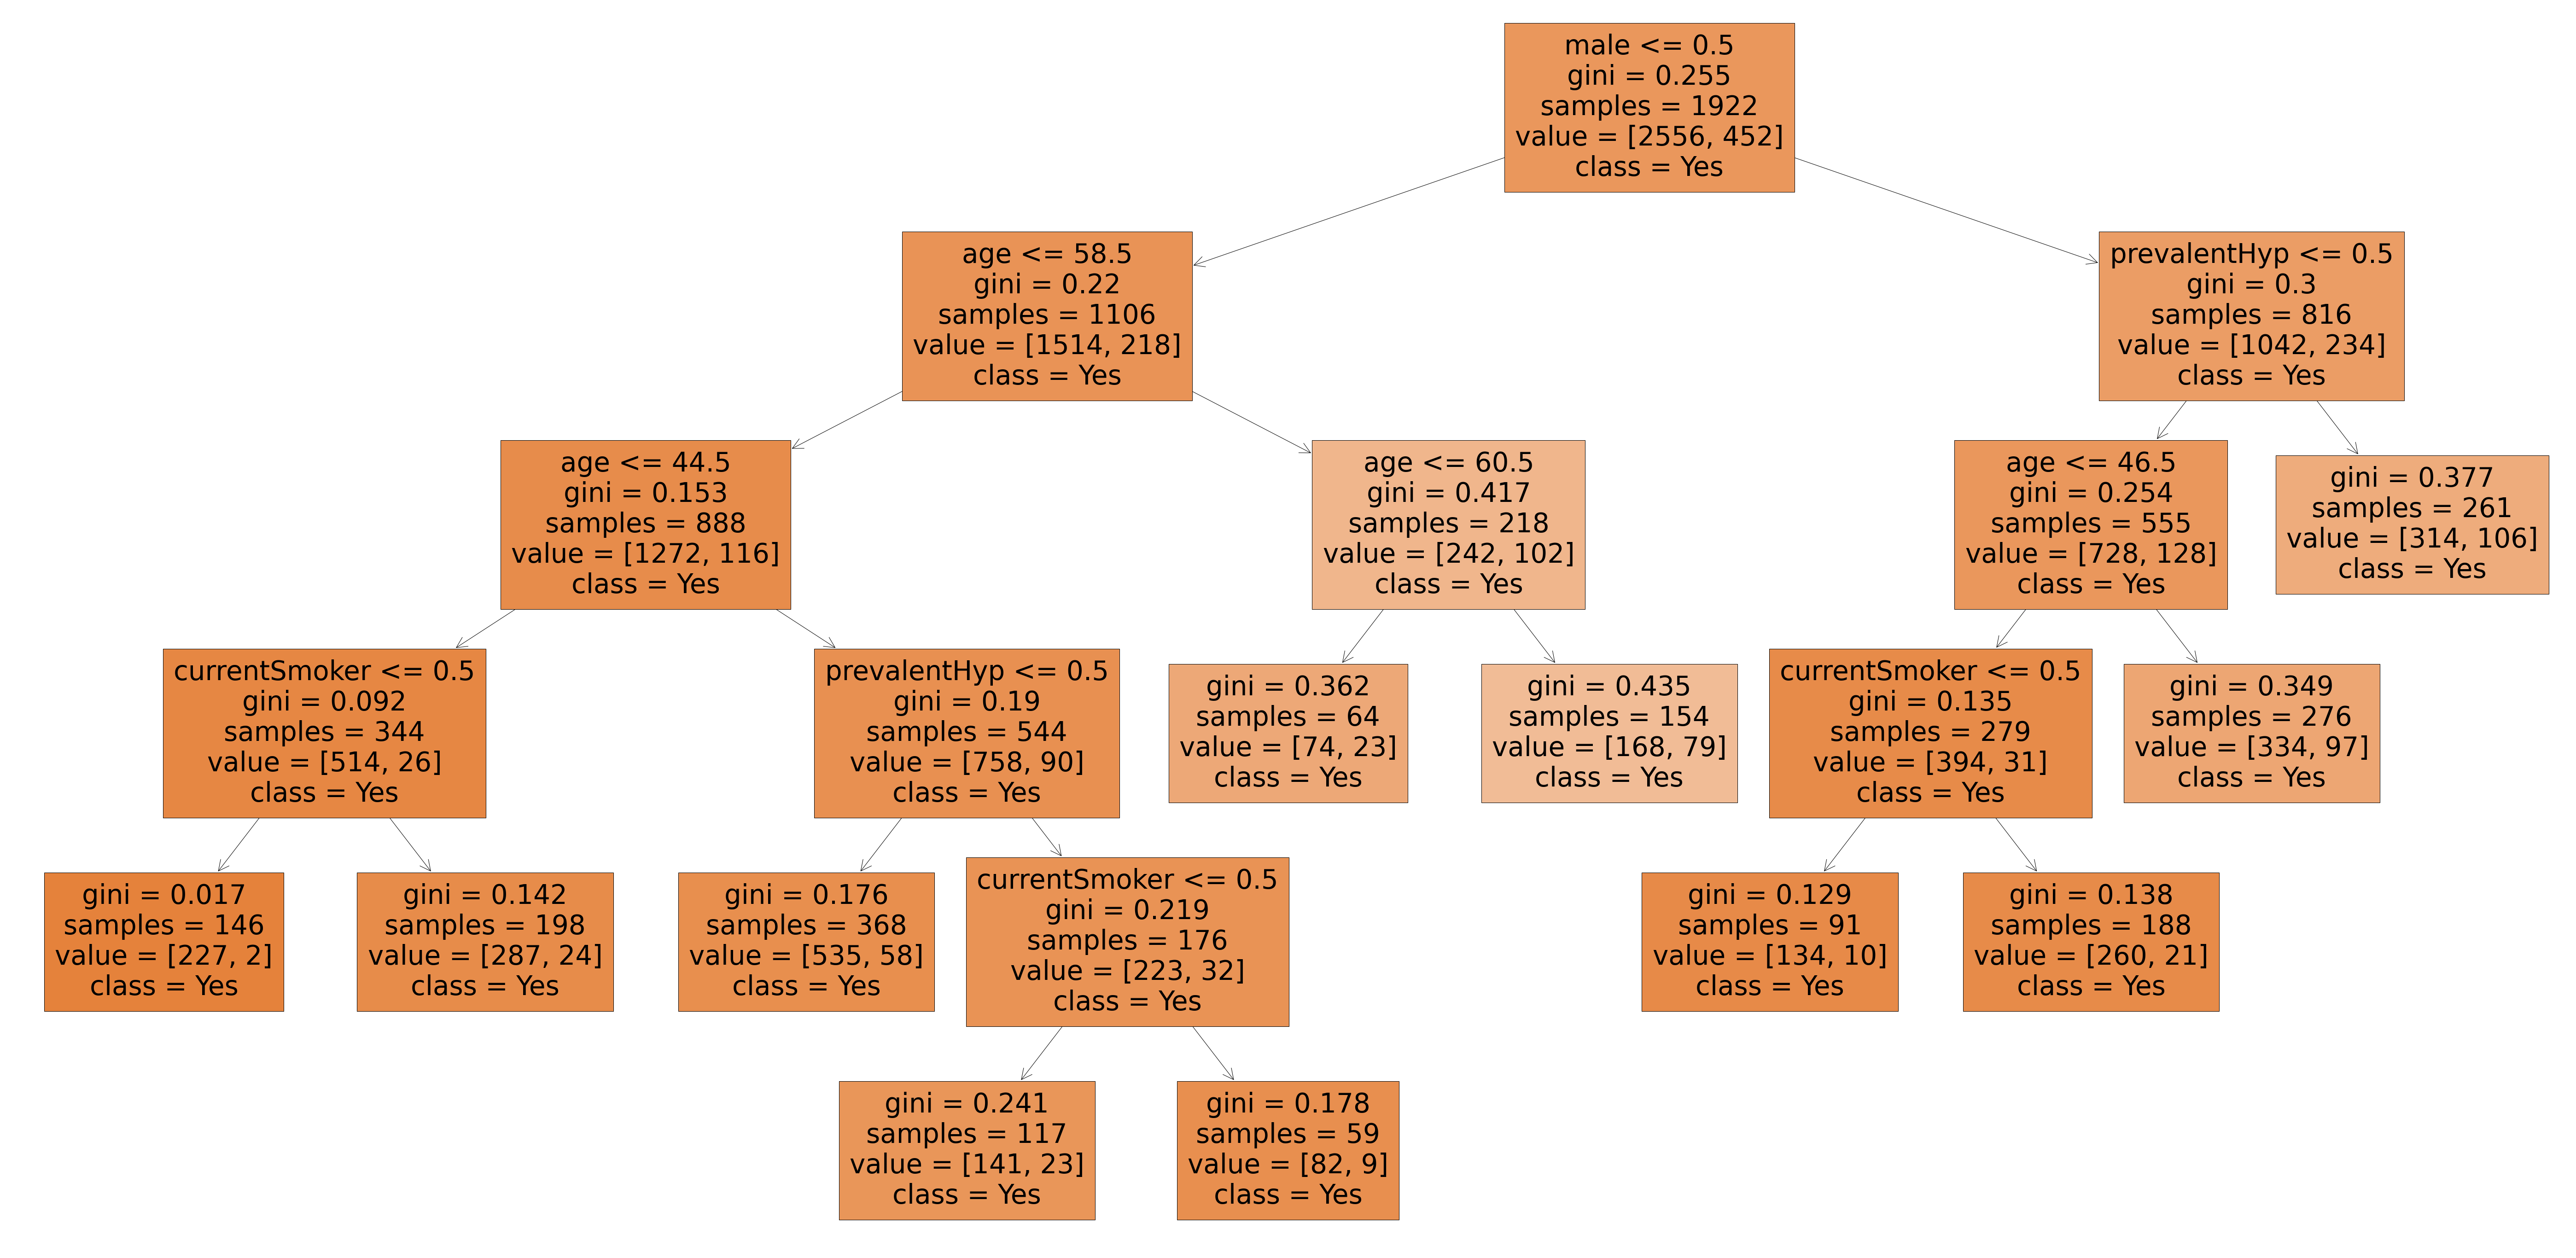

In [73]:
plt.figure(figsize=(100,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)

# C4

In [53]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C4_framingham.csv")
a

male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4233     1   50        1.0              1         1.0     0.0   
4234     1   51        3.0              1        43.0     0.0   
4235     0   48        2.0              1        20.0     NaN   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0   81.0  28.73   
2                   0             0         0    245.0  127.5   80.0  25.34   
3                   0             1         0    225.0  150.0   95.0  28.58   
4                   0             0         0    285.0  130.0   84.0  23.10   
...               ...           ...       ...      ...    ...    ...    ...   
4233                0             1         0    313.0  179.0   92.0  25.97   
4234                0             0         0    207.0  126.5   80.0  19.71   
4235                0             0         0    248.0  131.0   72.0  22.00   
4236                0             0         0    210.0  126.5   87.0  19.16   
4237                0             0         0    269.0  133.5   83.0  21.47   

      heartRate  glucose  TenYearCHD  
0          80.0     77.0           0  
1          95.0     76.0           0  
2          75.0     70.0           0  
3          65.0    103.0           1  
4          85.0     85.0           0  
...         ...      ...         ...  
4233       66.0     86.0           1  
4234       65.0     68.0           0  
4235       84.0     86.0           0  
4236       86.0      NaN           0  
4237       80.0    107.0           0  

[4238 rows x 16 columns]

In [54]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [57]:
c=a[['male','age','currentSmoker','prevalentStroke','prevalentHyp','diabetes','TenYearCHD']]
c

male  age  currentSmoker  prevalentStroke  prevalentHyp  diabetes  \
0        1   39              0                0             0         0   
1        0   46              0                0             0         0   
2        1   48              1                0             0         0   
3        0   61              1                0             1         0   
4        0   46              1                0             0         0   
...    ...  ...            ...              ...           ...       ...   
4233     1   50              1                0             1         0   
4234     1   51              1                0             0         0   
4235     0   48              1                0             0         0   
4236     0   44              1                0             0         0   
4237     0   52              0                0             0         0   

      TenYearCHD  
0              0  
1              0  
2              0  
3              1  
4              0  
...          ...  
4233           1  
4234           0  
4235           0  
4236           0  
4237           0  

[4238 rows x 7 columns]

In [58]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   male             4238 non-null   int64
 1   age              4238 non-null   int64
 2   currentSmoker    4238 non-null   int64
 3   prevalentStroke  4238 non-null   int64
 4   prevalentHyp     4238 non-null   int64
 5   diabetes         4238 non-null   int64
 6   TenYearCHD       4238 non-null   int64
dtypes: int64(7)
memory usage: 231.9 KB


In [59]:
c['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [60]:
x=c.drop('TenYearCHD',axis=1)
y=c['TenYearCHD']

In [61]:
z={"TenYearCHD":{'0':12,'1':24}}
c=c.replace(z)
print(c)

      male  age  currentSmoker  prevalentStroke  prevalentHyp  diabetes  \
0        1   39              0                0             0         0   
1        0   46              0                0             0         0   
2        1   48              1                0             0         0   
3        0   61              1                0             1         0   
4        0   46              1                0             0         0   
...    ...  ...            ...              ...           ...       ...   
4233     1   50              1                0             1         0   
4234     1   51              1                0             0         0   
4235     0   48              1                0             0         0   
4236     0   44              1                0             0         0   
4237     0   52              0                0             0         0   

      TenYearCHD  
0              0  
1              0  
2              0  
3              1  
4   

In [62]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

In [63]:
m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [64]:
parameters={'max_depth':[12,15,14,65,32],
           'min_samples_leaf':[45,56,35,21,57],
           'n_estimators':[12,54,32,93,82]}

In [65]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [12, 15, 14, 65, 32],
                         'min_samples_leaf': [45, 56, 35, 21, 57],
                         'n_estimators': [12, 54, 32, 93, 82]},
             scoring='accuracy')

In [66]:
grid_search.best_score_

0.852061170212766

In [67]:
rfc_best=grid_search.best_estimator_

[Text(2502.28125, 2491.5, 'male <= 0.5\ngini = 0.255\nsamples = 1922\nvalue = [2556, 452]\nclass = Yes'),
 Text(1586.8125, 2038.5, 'age <= 58.5\ngini = 0.22\nsamples = 1106\nvalue = [1514, 218]\nclass = Yes'),
 Text(976.5, 1585.5, 'age <= 44.5\ngini = 0.153\nsamples = 888\nvalue = [1272, 116]\nclass = Yes'),
 Text(488.25, 1132.5, 'currentSmoker <= 0.5\ngini = 0.092\nsamples = 344\nvalue = [514, 26]\nclass = Yes'),
 Text(244.125, 679.5, 'gini = 0.017\nsamples = 146\nvalue = [227, 2]\nclass = Yes'),
 Text(732.375, 679.5, 'gini = 0.142\nsamples = 198\nvalue = [287, 24]\nclass = Yes'),
 Text(1464.75, 1132.5, 'prevalentHyp <= 0.5\ngini = 0.19\nsamples = 544\nvalue = [758, 90]\nclass = Yes'),
 Text(1220.625, 679.5, 'gini = 0.176\nsamples = 368\nvalue = [535, 58]\nclass = Yes'),
 Text(1708.875, 679.5, 'currentSmoker <= 0.5\ngini = 0.219\nsamples = 176\nvalue = [223, 32]\nclass = Yes'),
 Text(1464.75, 226.5, 'gini = 0.241\nsamples = 117\nvalue = [141, 23]\nclass = Yes'),
 Text(1953.0, 226.5, '

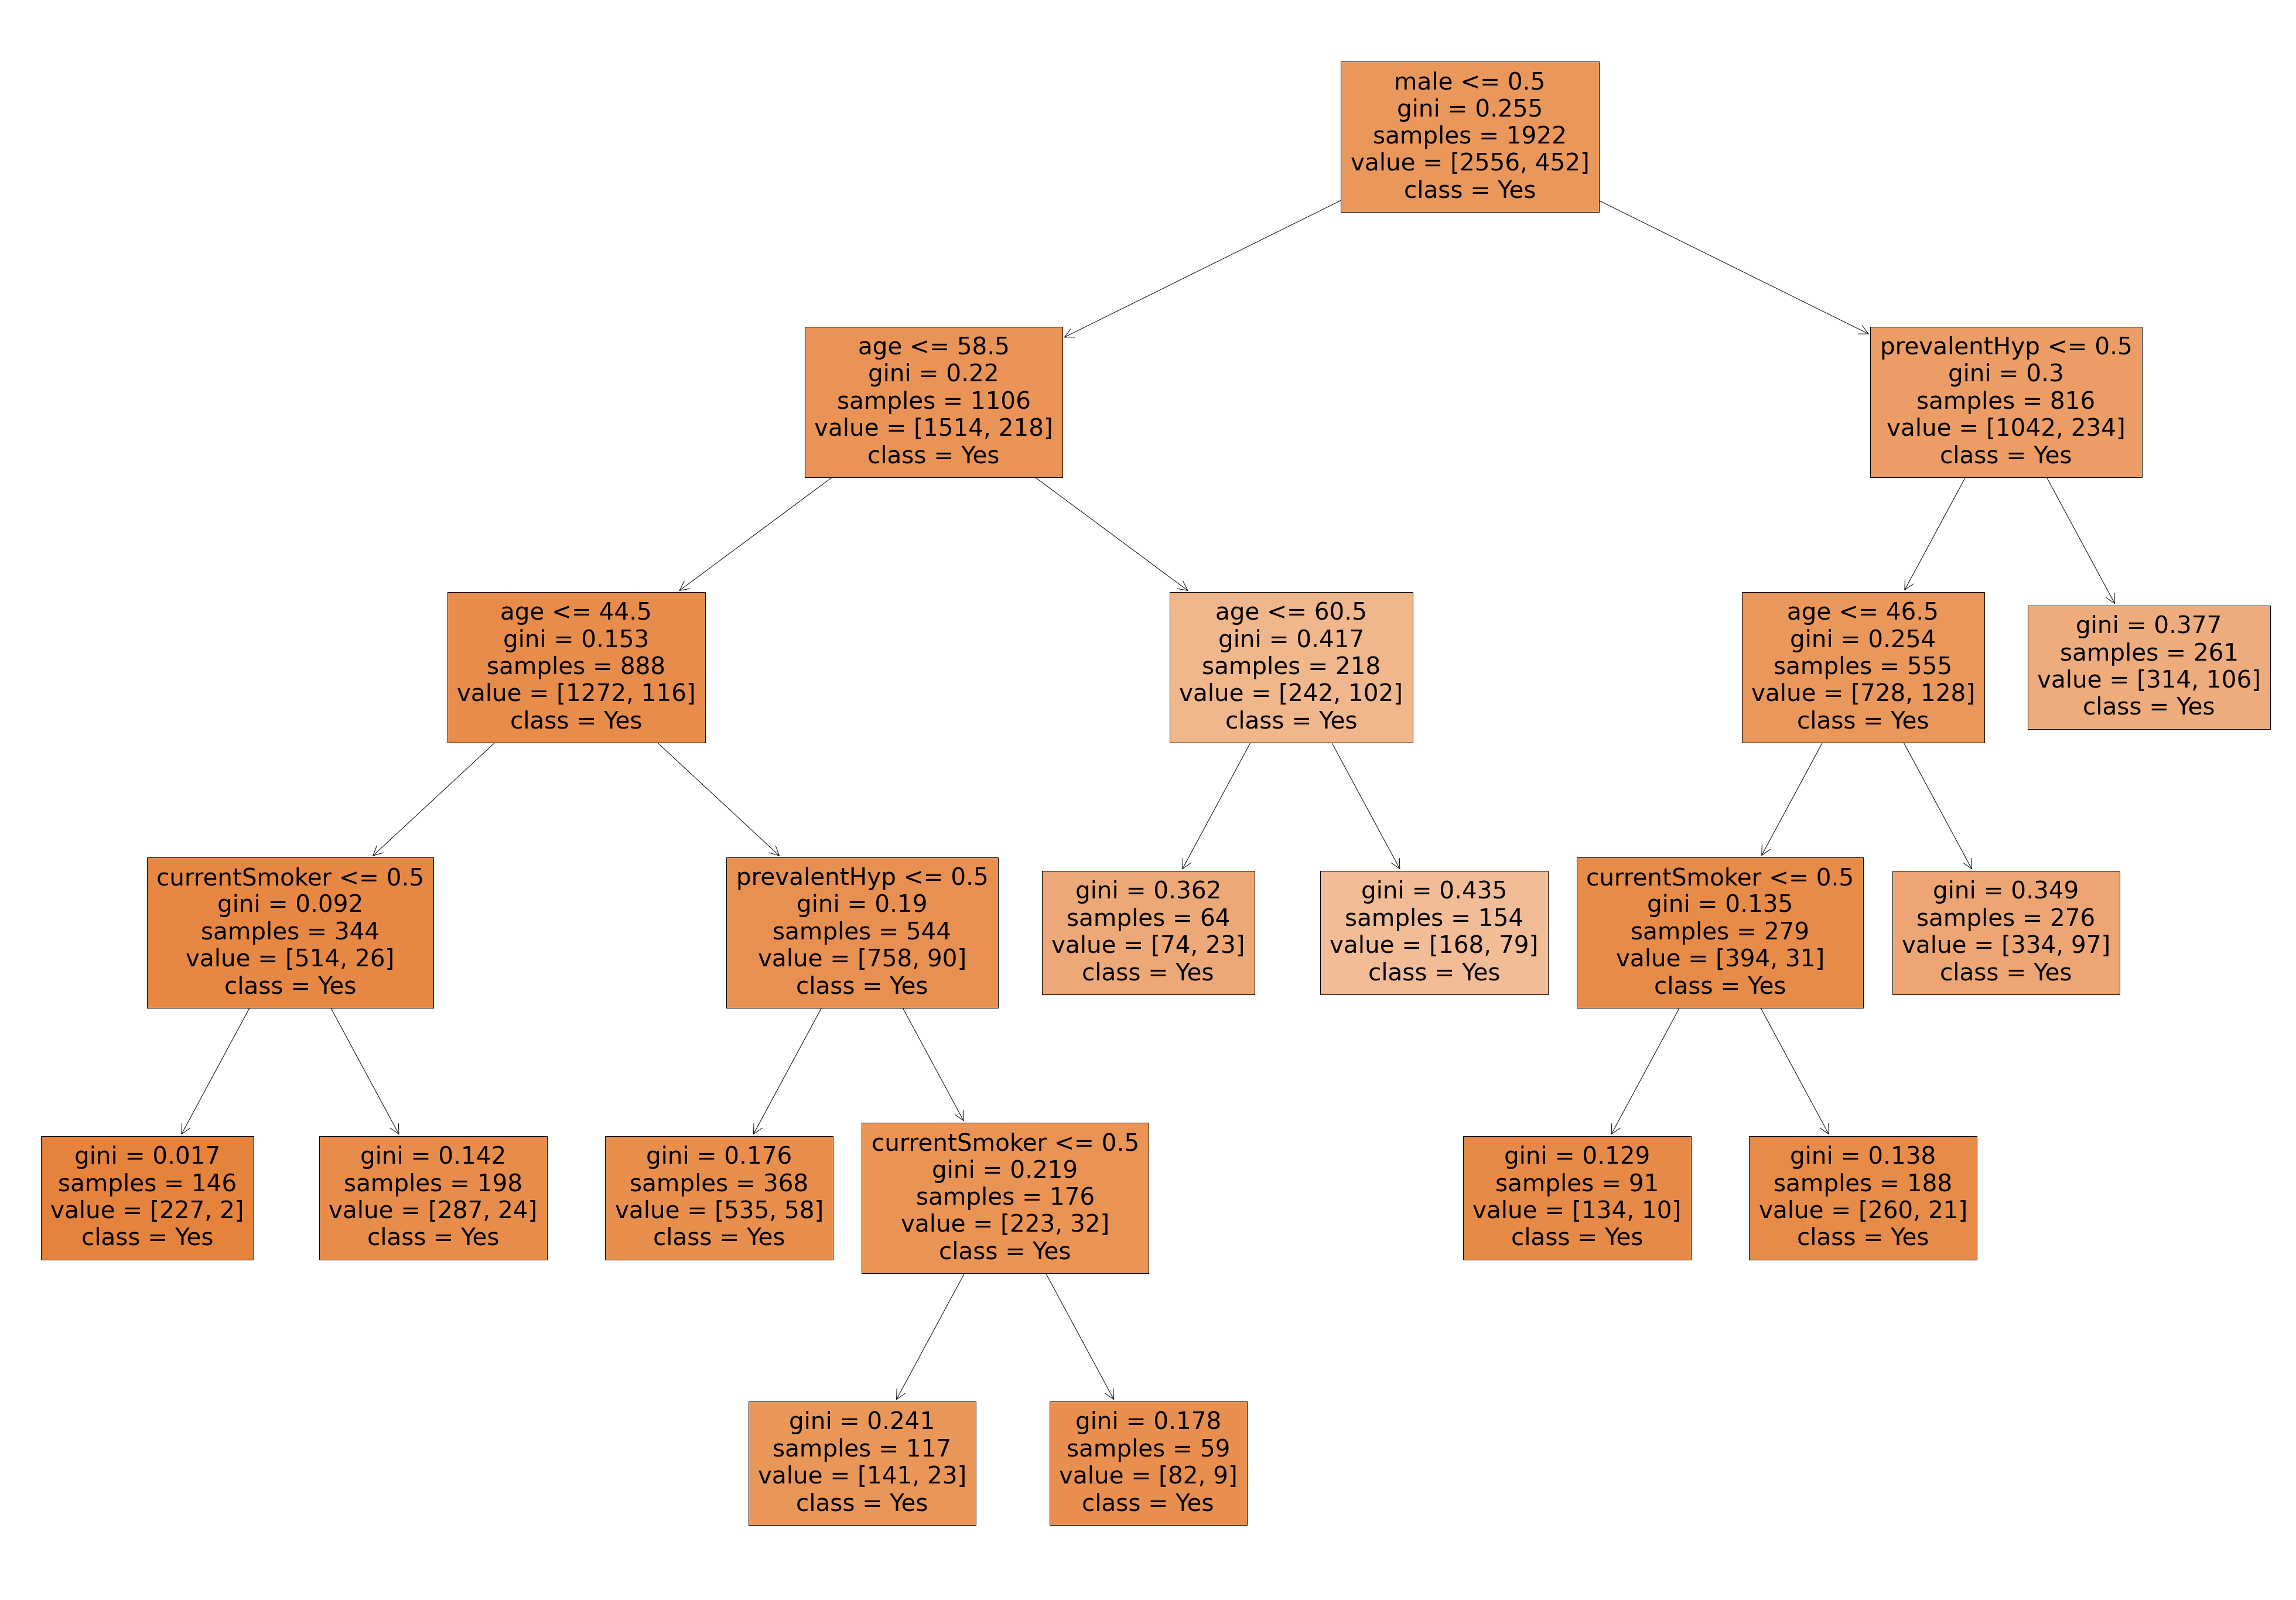

In [68]:
plt.figure(figsize=(70,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)

# C5

In [69]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C5_health care diabetes.csv")
a

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [70]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [71]:
c=a[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','Age','Outcome']]
c

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  Age  Outcome
0              6      148             72             35        0   50        1
1              1       85             66             29        0   31        0
2              8      183             64              0        0   32        1
3              1       89             66             23       94   21        0
4              0      137             40             35      168   33        1
..           ...      ...            ...            ...      ...  ...      ...
763           10      101             76             48      180   63        0
764            2      122             70             27        0   27        0
765            5      121             72             23      112   30        0
766            1      126             60              0        0   47        1
767            1       93             70             31        0   23        0

[768 rows x 7 columns]

In [72]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Pregnancies    768 non-null    int64
 1   Glucose        768 non-null    int64
 2   BloodPressure  768 non-null    int64
 3   SkinThickness  768 non-null    int64
 4   Insulin        768 non-null    int64
 5   Age            768 non-null    int64
 6   Outcome        768 non-null    int64
dtypes: int64(7)
memory usage: 42.1 KB


In [74]:
c['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [75]:
x=c.drop('Outcome',axis=1)
y=c['Outcome']

In [76]:
z={"Outcome":{'0':45,'0':64}}
c=c.replace(z)
print(c)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  Age  Outcome
0              6      148             72             35        0   50        1
1              1       85             66             29        0   31        0
2              8      183             64              0        0   32        1
3              1       89             66             23       94   21        0
4              0      137             40             35      168   33        1
..           ...      ...            ...            ...      ...  ...      ...
763           10      101             76             48      180   63        0
764            2      122             70             27        0   27        0
765            5      121             72             23      112   30        0
766            1      126             60              0        0   47        1
767            1       93             70             31        0   23        0

[768 rows x 7 columns]


In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [78]:
parameters={'max_depth':[54,84,56,45,78],
           'min_samples_leaf':[54,54,12,87,45],
           'n_estimators':[12,27,54,87,19]}

In [79]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [54, 84, 56, 45, 78],
                         'min_samples_leaf': [54, 54, 12, 87, 45],
                         'n_estimators': [12, 27, 54, 87, 19]},
             scoring='accuracy')

In [80]:
grid_search.best_score_

0.7431049342814049

In [81]:
rfc_best=grid_search.best_estimator_

[Text(2799.765, 2567.0, 'Pregnancies <= 6.5\ngini = 0.447\nsamples = 336\nvalue = [361, 184]\nclass = Yes'),
 Text(1381.05, 2265.0, 'BloodPressure <= 69.0\ngini = 0.394\nsamples = 257\nvalue = [311, 115]\nclass = Yes'),
 Text(803.52, 1963.0, 'Insulin <= 152.0\ngini = 0.256\nsamples = 118\nvalue = [158, 28]\nclass = Yes'),
 Text(602.64, 1661.0, 'Age <= 29.5\ngini = 0.179\nsamples = 94\nvalue = [136, 15]\nclass = Yes'),
 Text(401.76, 1359.0, 'BloodPressure <= 49.0\ngini = 0.131\nsamples = 79\nvalue = [119, 9]\nclass = Yes'),
 Text(200.88, 1057.0, 'gini = 0.308\nsamples = 12\nvalue = [17, 4]\nclass = Yes'),
 Text(602.64, 1057.0, 'Pregnancies <= 2.5\ngini = 0.089\nsamples = 67\nvalue = [102, 5]\nclass = Yes'),
 Text(401.76, 755.0, 'Pregnancies <= 0.5\ngini = 0.049\nsamples = 47\nvalue = [77, 2]\nclass = Yes'),
 Text(200.88, 453.0, 'gini = 0.188\nsamples = 13\nvalue = [17, 2]\nclass = Yes'),
 Text(602.64, 453.0, 'gini = 0.0\nsamples = 34\nvalue = [60, 0]\nclass = Yes'),
 Text(803.52, 755.0,

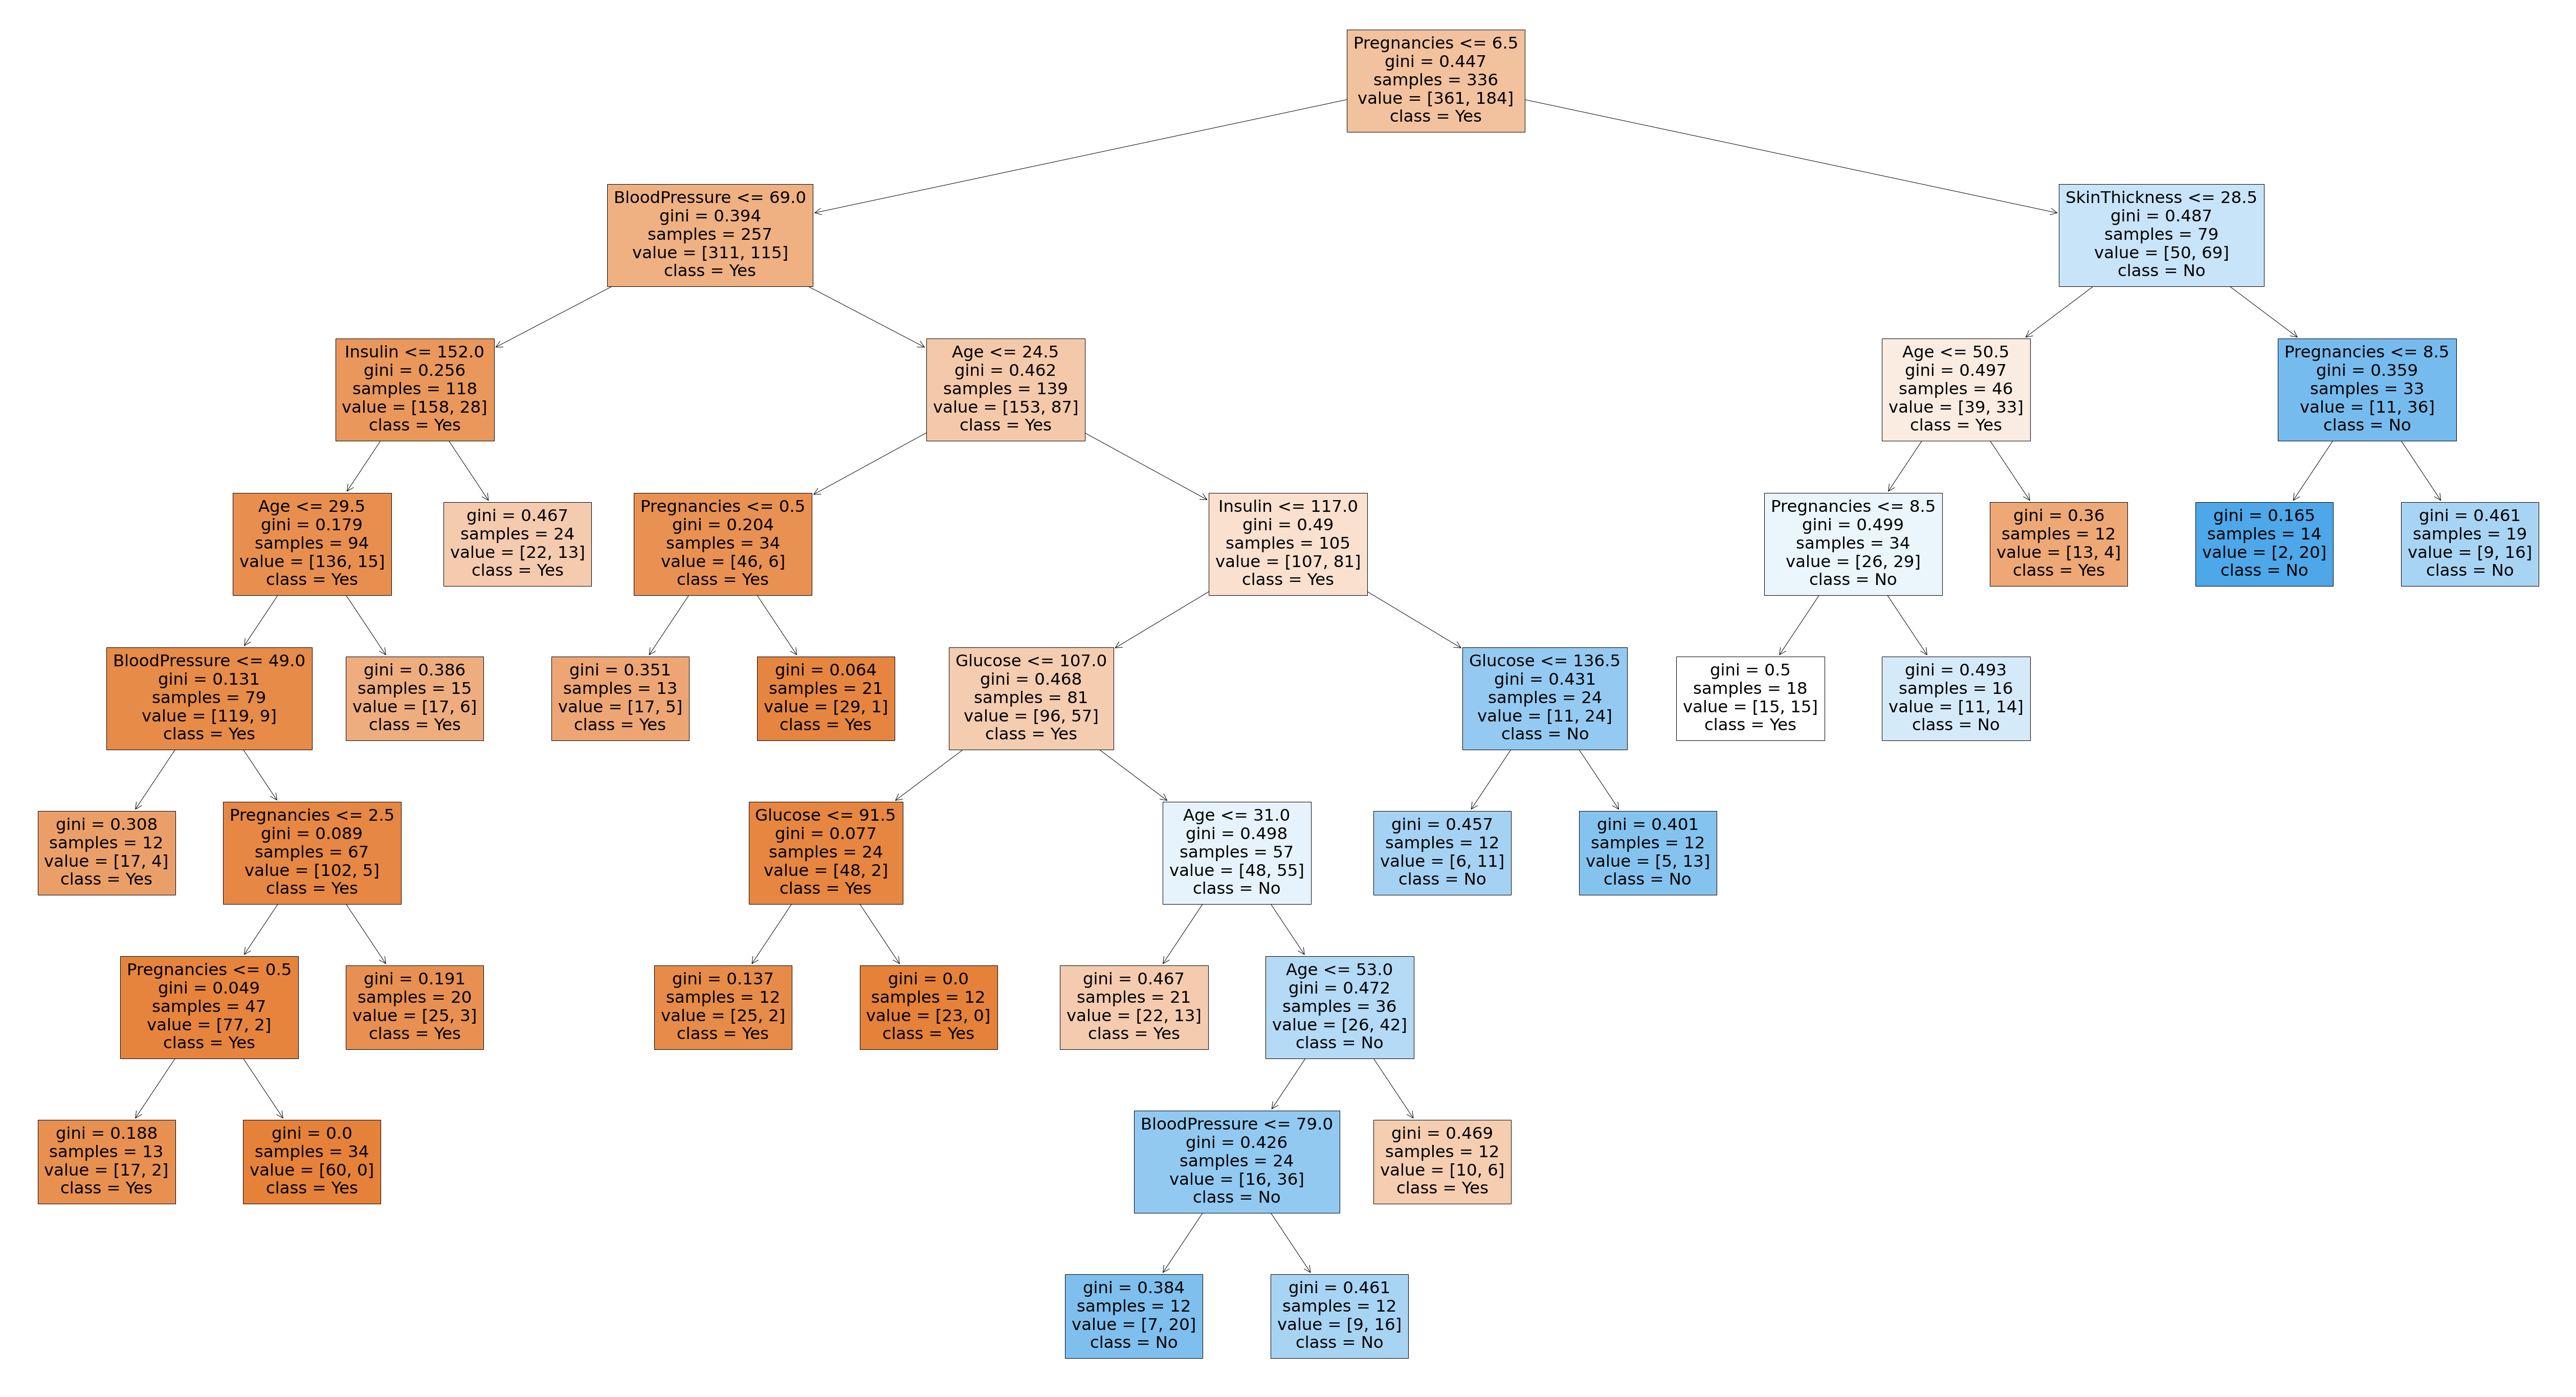

In [82]:
plt.figure(figsize=(90,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)

# C6

In [83]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C6_bmi.csv")
a

Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]

In [84]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Index   500 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 15.8+ KB


In [86]:
c=a.iloc[:,0:4]
c

Gender  Height  Weight  Index
0      Male     174      96      4
1      Male     189      87      2
2    Female     185     110      4
3    Female     195     104      3
4      Male     149      61      3
..      ...     ...     ...    ...
495  Female     150     153      5
496  Female     184     121      4
497  Female     141     136      5
498    Male     150      95      5
499    Male     173     131      5

[500 rows x 4 columns]

In [87]:
c['Gender'].value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [88]:
x=c.drop('Gender',axis=1)
y=c['Gender']

In [89]:
z={"Gender":{'Female':19,'Male':32}}
c=c.replace(z)
print(c)

     Gender  Height  Weight  Index
0        32     174      96      4
1        32     189      87      2
2        19     185     110      4
3        19     195     104      3
4        32     149      61      3
..      ...     ...     ...    ...
495      19     150     153      5
496      19     184     121      4
497      19     141     136      5
498      32     150      95      5
499      32     173     131      5

[500 rows x 4 columns]


In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [91]:
parameters={'max_depth':[65,98,8,15,58],
           'min_samples_leaf':[45,54,78,20,45],
           'n_estimators':[87,32,37,78,33]}

In [92]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [65, 98, 8, 15, 58],
                         'min_samples_leaf': [45, 54, 78, 20, 45],
                         'n_estimators': [87, 32, 37, 78, 33]},
             scoring='accuracy')

In [93]:
grid_search.best_score_

0.546419729575319

In [94]:
rfc_best=grid_search.best_estimator_


[Text(2008.8, 2265.0, 'Height <= 163.5\ngini = 0.499\nsamples = 215\nvalue = [185, 170]\nclass = Yes'),
 Text(1004.4, 1359.0, 'gini = 0.479\nsamples = 76\nvalue = [48, 73]\nclass = No'),
 Text(3013.2, 1359.0, 'Height <= 186.5\ngini = 0.485\nsamples = 139\nvalue = [137, 97]\nclass = Yes'),
 Text(2008.8, 453.0, 'gini = 0.473\nsamples = 91\nvalue = [98, 61]\nclass = Yes'),
 Text(4017.6, 453.0, 'gini = 0.499\nsamples = 48\nvalue = [39, 36]\nclass = Yes')]

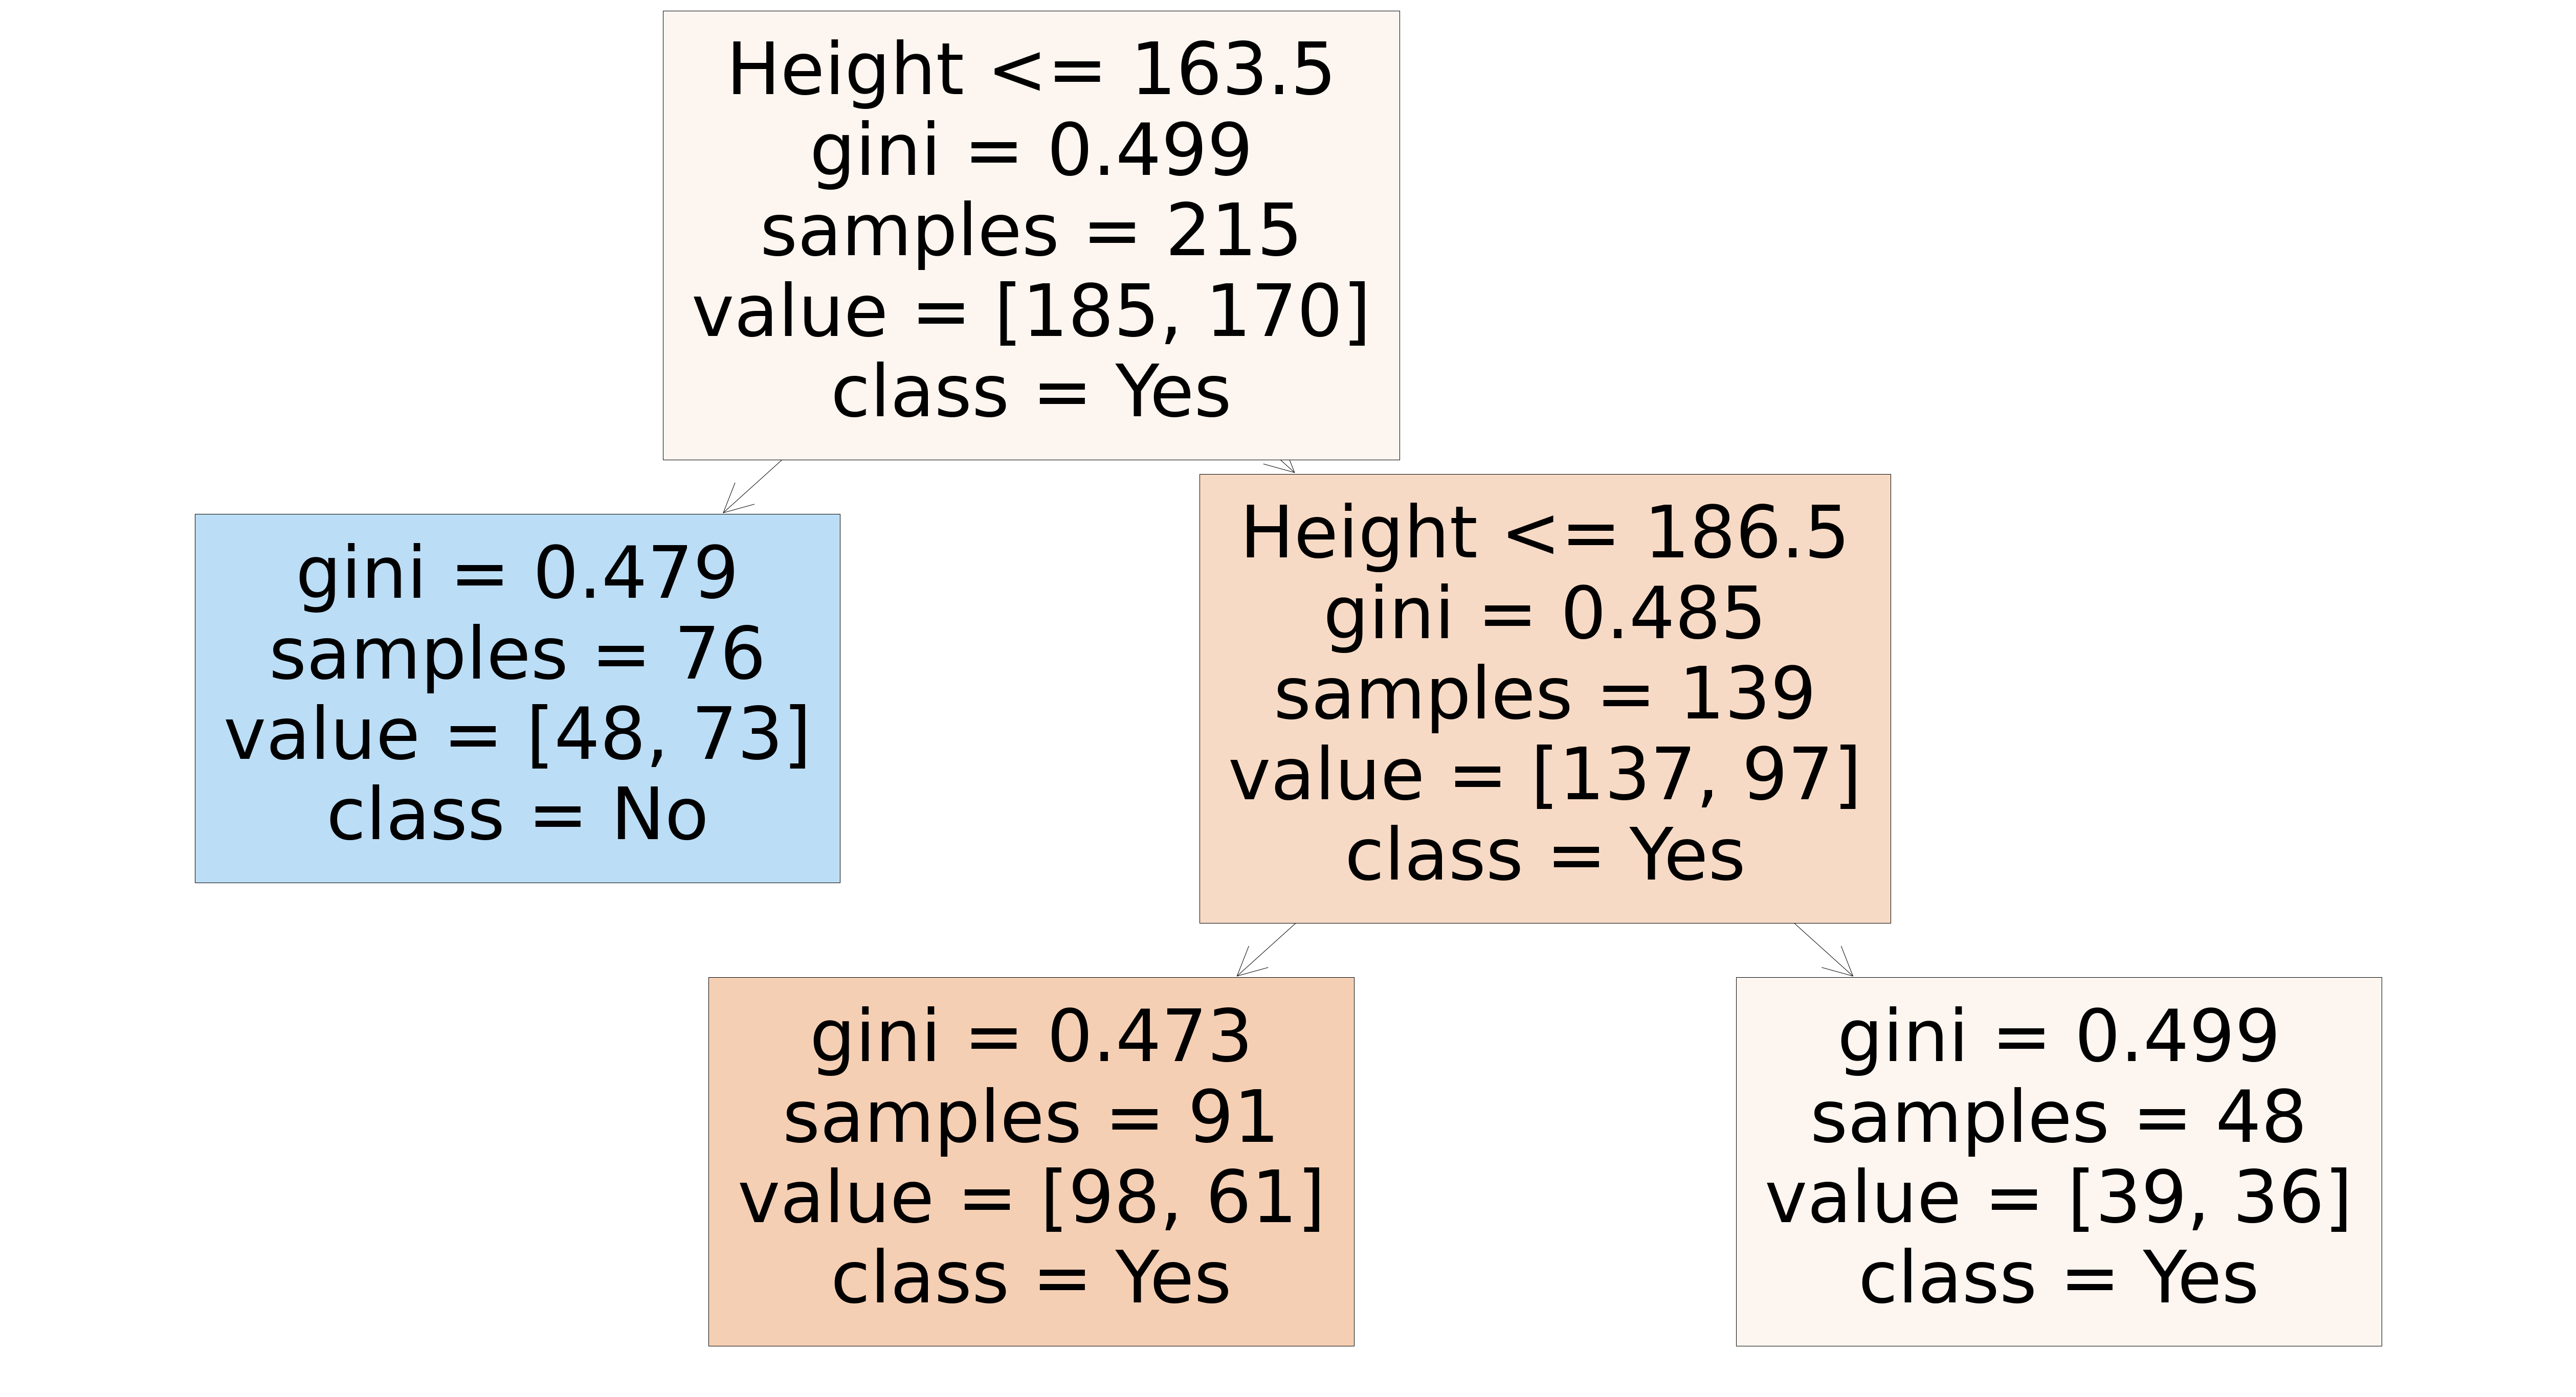

In [95]:
plt.figure(figsize=(90,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)

# C7

In [109]:
a=pd.read_csv(r"E:\Python Data Science\Documents\c7_used_cars.csv")
a

Unnamed: 0   model  year  price transmission  mileage fuelType  tax  \
0               0   T-Roc  2019  25000    Automatic    13904   Diesel  145   
1               1   T-Roc  2019  26883    Automatic     4562   Diesel  145   
2               2   T-Roc  2019  20000       Manual     7414   Diesel  145   
3               3   T-Roc  2019  33492    Automatic     4825   Petrol  145   
4               4   T-Roc  2019  22900    Semi-Auto     6500   Petrol  150   
...           ...     ...   ...    ...          ...      ...      ...  ...   
99182       10663      A3  2020  16999       Manual     4018   Petrol  145   
99183       10664      A3  2020  16999       Manual     1978   Petrol  150   
99184       10665      A3  2020  17199       Manual      609   Petrol  150   
99185       10666      Q3  2017  19499    Automatic     8646   Petrol  150   
99186       10667      Q3  2016  15999       Manual    11855   Petrol  150   

        mpg  engineSize  Make  
0      49.6         2.0    VW  
1      49.6         2.0    VW  
2      50.4         2.0    VW  
3      32.5         2.0    VW  
4      39.8         1.5    VW  
...     ...         ...   ...  
99182  49.6         1.0  Audi  
99183  49.6         1.0  Audi  
99184  49.6         1.0  Audi  
99185  47.9         1.4  Audi  
99186  47.9         1.4  Audi  

[99187 rows x 11 columns]

In [110]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99187 entries, 0 to 99186
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    99187 non-null  int64  
 1   model         99187 non-null  object 
 2   year          99187 non-null  int64  
 3   price         99187 non-null  int64  
 4   transmission  99187 non-null  object 
 5   mileage       99187 non-null  int64  
 6   fuelType      99187 non-null  object 
 7   tax           99187 non-null  int64  
 8   mpg           99187 non-null  float64
 9   engineSize    99187 non-null  float64
 10  Make          99187 non-null  object 
dtypes: float64(2), int64(5), object(4)
memory usage: 8.3+ MB


In [111]:
c=a[['Unnamed: 0','year','price','mileage','tax','transmission']]
c=c.head(10000)
c

Unnamed: 0  year  price  mileage  tax transmission
0              0  2019  25000    13904  145    Automatic
1              1  2019  26883     4562  145    Automatic
2              2  2019  20000     7414  145       Manual
3              3  2019  33492     4825  145    Automatic
4              4  2019  22900     6500  150    Semi-Auto
...          ...   ...    ...      ...  ...          ...
9995        9995  2015   8700    59650   20    Automatic
9996        9996  2009   2495    41637  145       Manual
9997        9997  2017  11000    14809  150       Manual
9998        9998  2016  12000    15441   20       Manual
9999        9999  2017   9100    38291  150       Manual

[10000 rows x 6 columns]

In [112]:
c['transmission'].value_counts()

Manual       6762
Semi-Auto    2210
Automatic    1028
Name: transmission, dtype: int64

In [113]:
x=c.drop('transmission',axis=1)
y=c['transmission']

In [114]:
z={"transmission":{'Manual':564,'Semi-Auto':655,'Automatic':549,'Other':123}}
c=c.replace(z)
print(c)

      Unnamed: 0  year  price  mileage  tax  transmission
0              0  2019  25000    13904  145           549
1              1  2019  26883     4562  145           549
2              2  2019  20000     7414  145           564
3              3  2019  33492     4825  145           549
4              4  2019  22900     6500  150           655
...          ...   ...    ...      ...  ...           ...
9995        9995  2015   8700    59650   20           549
9996        9996  2009   2495    41637  145           564
9997        9997  2017  11000    14809  150           564
9998        9998  2016  12000    15441   20           564
9999        9999  2017   9100    38291  150           564

[10000 rows x 6 columns]


In [115]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [116]:
parameters={'max_depth':[65,98,8,15,58],
           'min_samples_leaf':[45,84,65,23,45],
           'n_estimators':[12,27,65,78,33]}

In [117]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [65, 98, 8, 15, 58],
                         'min_samples_leaf': [45, 84, 65, 23, 45],
                         'n_estimators': [12, 27, 65, 78, 33]},
             scoring='accuracy')

In [118]:
grid_search.best_score_

0.7640845070422535

In [119]:
rfc_best=grid_search.best_estimator_

[Text(2756.731085526316, 2627.4, 'price <= 18999.5\ngini = 0.485\nsamples = 4508\nvalue = [722, 4787, 1591]\nclass = 2'),
 Text(997.3791118421053, 2446.2, 'mileage <= 3176.5\ngini = 0.357\nsamples = 3334\nvalue = [315, 4087, 810]\nclass = 2'),
 Text(132.1578947368421, 2265.0, 'tax <= 147.5\ngini = 0.239\nsamples = 206\nvalue = [17, 281, 26]\nclass = 2'),
 Text(99.11842105263159, 2083.8, 'mileage <= 357.0\ngini = 0.197\nsamples = 172\nvalue = [13, 242, 16]\nclass = 2'),
 Text(66.07894736842105, 1902.6, 'gini = 0.0\nsamples = 31\nvalue = [0, 51, 0]\nclass = 2'),
 Text(132.1578947368421, 1902.6, 'mileage <= 2857.5\ngini = 0.237\nsamples = 141\nvalue = [13, 191, 16]\nclass = 2'),
 Text(99.11842105263159, 1721.4, 'mileage <= 2080.5\ngini = 0.275\nsamples = 113\nvalue = [11, 146, 16]\nclass = 2'),
 Text(66.07894736842105, 1540.2, 'price <= 15922.5\ngini = 0.213\nsamples = 72\nvalue = [7, 106, 7]\nclass = 2'),
 Text(33.03947368421053, 1359.0, 'gini = 0.069\nsamples = 32\nvalue = [2, 54, 0]\nc

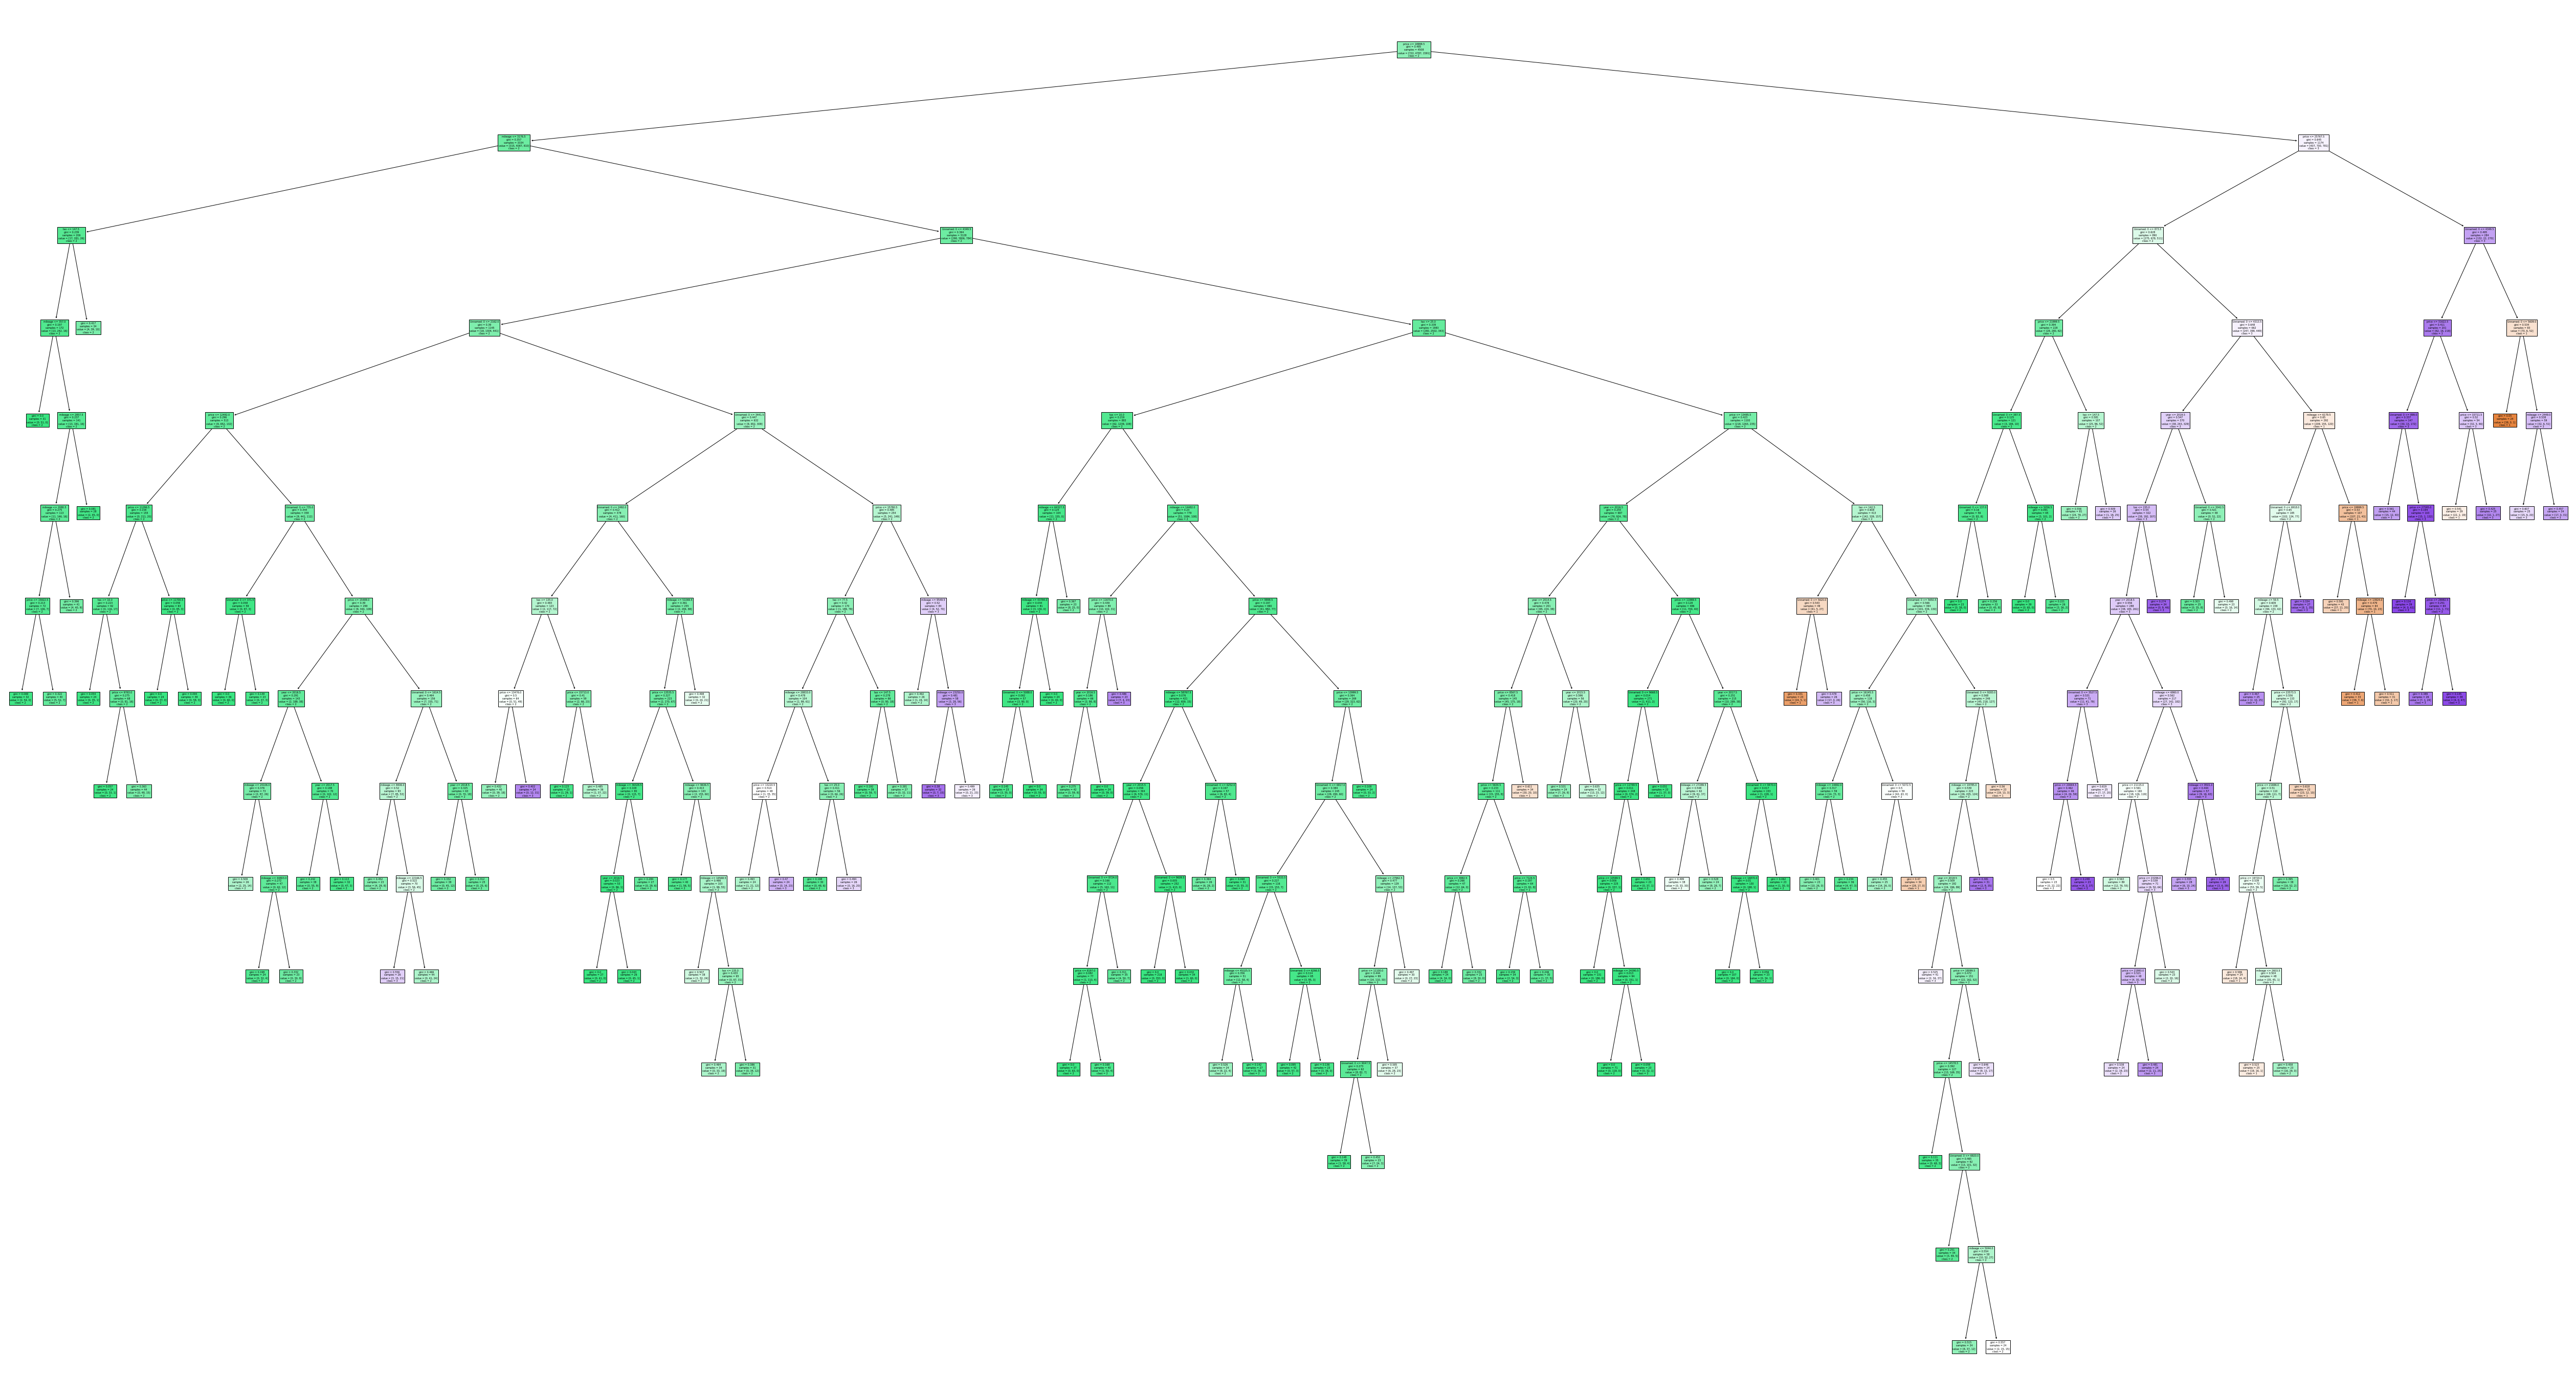

In [121]:
plt.figure(figsize=(90,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['1','2','3','4'],filled=True)

# C8

In [144]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C8_loan-train.csv")
a

Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
0               1.0         Urban           Y  
1               1.0         Rural           N  
2               1.0         Urban           Y  
3               1.0         Urban           Y  
4               1.0         Urban           Y  
..              ...           ...         ...  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611             1.0         Urban           Y  
612             1.0         Urban           Y  
613             0.0     Semiurban           N  

[614 rows x 13 columns]

In [145]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [146]:
a=a[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Self_Employed']]
a

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849                0.0         NaN             360.0   
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Self_Employed  
0               1.0            No  
1               1.0            No  
2               1.0           Yes  
3               1.0            No  
4               1.0            No  
..              ...           ...  
609             1.0            No  
610             1.0            No  
611             1.0            No  
612             1.0            No  
613             0.0           Yes  

[614 rows x 6 columns]

In [147]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    614 non-null    int64  
 1   CoapplicantIncome  614 non-null    float64
 2   LoanAmount         592 non-null    float64
 3   Loan_Amount_Term   600 non-null    float64
 4   Credit_History     564 non-null    float64
 5   Self_Employed      582 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 28.9+ KB


In [148]:
c=a.dropna()
c

ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Self_Employed  
1               1.0            No  
2               1.0           Yes  
3               1.0            No  
4               1.0            No  
5               1.0           Yes  
..              ...           ...  
609             1.0            No  
610             1.0            No  
611             1.0            No  
612             1.0            No  
613             0.0           Yes  

[504 rows x 6 columns]

In [149]:
c.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 1 to 613
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ApplicantIncome    504 non-null    int64  
 1   CoapplicantIncome  504 non-null    float64
 2   LoanAmount         504 non-null    float64
 3   Loan_Amount_Term   504 non-null    float64
 4   Credit_History     504 non-null    float64
 5   Self_Employed      504 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 27.6+ KB


In [150]:
c['Self_Employed'].value_counts()

No     434
Yes     70
Name: Self_Employed, dtype: int64

In [151]:
x=c.drop('Self_Employed',axis=1)
y=c['Self_Employed']

In [152]:
z={"Self_Employed":{'No':33,'Yes':54}}
c=c.replace(z)
print(c)

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
1               4583             1508.0       128.0             360.0   
2               3000                0.0        66.0             360.0   
3               2583             2358.0       120.0             360.0   
4               6000                0.0       141.0             360.0   
5               5417             4196.0       267.0             360.0   
..               ...                ...         ...               ...   
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History  Self_Employed  
1               1.0             33  
2               1.0             54  
3           

In [153]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [154]:
parameters={'max_depth':[10,13,17,15,58],
           'min_samples_leaf':[15,16,17,18,19],
           'n_estimators':[12,22,23,24,25]}

In [155]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 13, 17, 15, 58],
                         'min_samples_leaf': [15, 16, 17, 18, 19],
                         'n_estimators': [12, 22, 23, 24, 25]},
             scoring='accuracy')

In [156]:
grid_search.best_score_

0.8571495825748541

In [157]:
rfc_best=grid_search.best_estimator_

[Text(2790.0, 2989.7999999999997, 'ApplicantIncome <= 6047.5\ngini = 0.216\nsamples = 218\nvalue = [313, 44]\nclass = Yes'),
 Text(1860.0, 2446.2, 'ApplicantIncome <= 3007.5\ngini = 0.123\nsamples = 162\nvalue = [256, 18]\nclass = Yes'),
 Text(1116.0, 1902.6, 'CoapplicantIncome <= 2437.5\ngini = 0.184\nsamples = 62\nvalue = [96, 11]\nclass = Yes'),
 Text(744.0, 1358.9999999999998, 'CoapplicantIncome <= 8.06\ngini = 0.112\nsamples = 47\nvalue = [79, 5]\nclass = Yes'),
 Text(372.0, 815.3999999999996, 'gini = 0.26\nsamples = 16\nvalue = [22, 4]\nclass = Yes'),
 Text(1116.0, 815.3999999999996, 'CoapplicantIncome <= 1812.5\ngini = 0.034\nsamples = 31\nvalue = [57, 1]\nclass = Yes'),
 Text(744.0, 271.7999999999997, 'gini = 0.061\nsamples = 15\nvalue = [31, 1]\nclass = Yes'),
 Text(1488.0, 271.7999999999997, 'gini = 0.0\nsamples = 16\nvalue = [26, 0]\nclass = Yes'),
 Text(1488.0, 1358.9999999999998, 'gini = 0.386\nsamples = 15\nvalue = [17, 6]\nclass = Yes'),
 Text(2604.0, 1902.6, 'ApplicantI

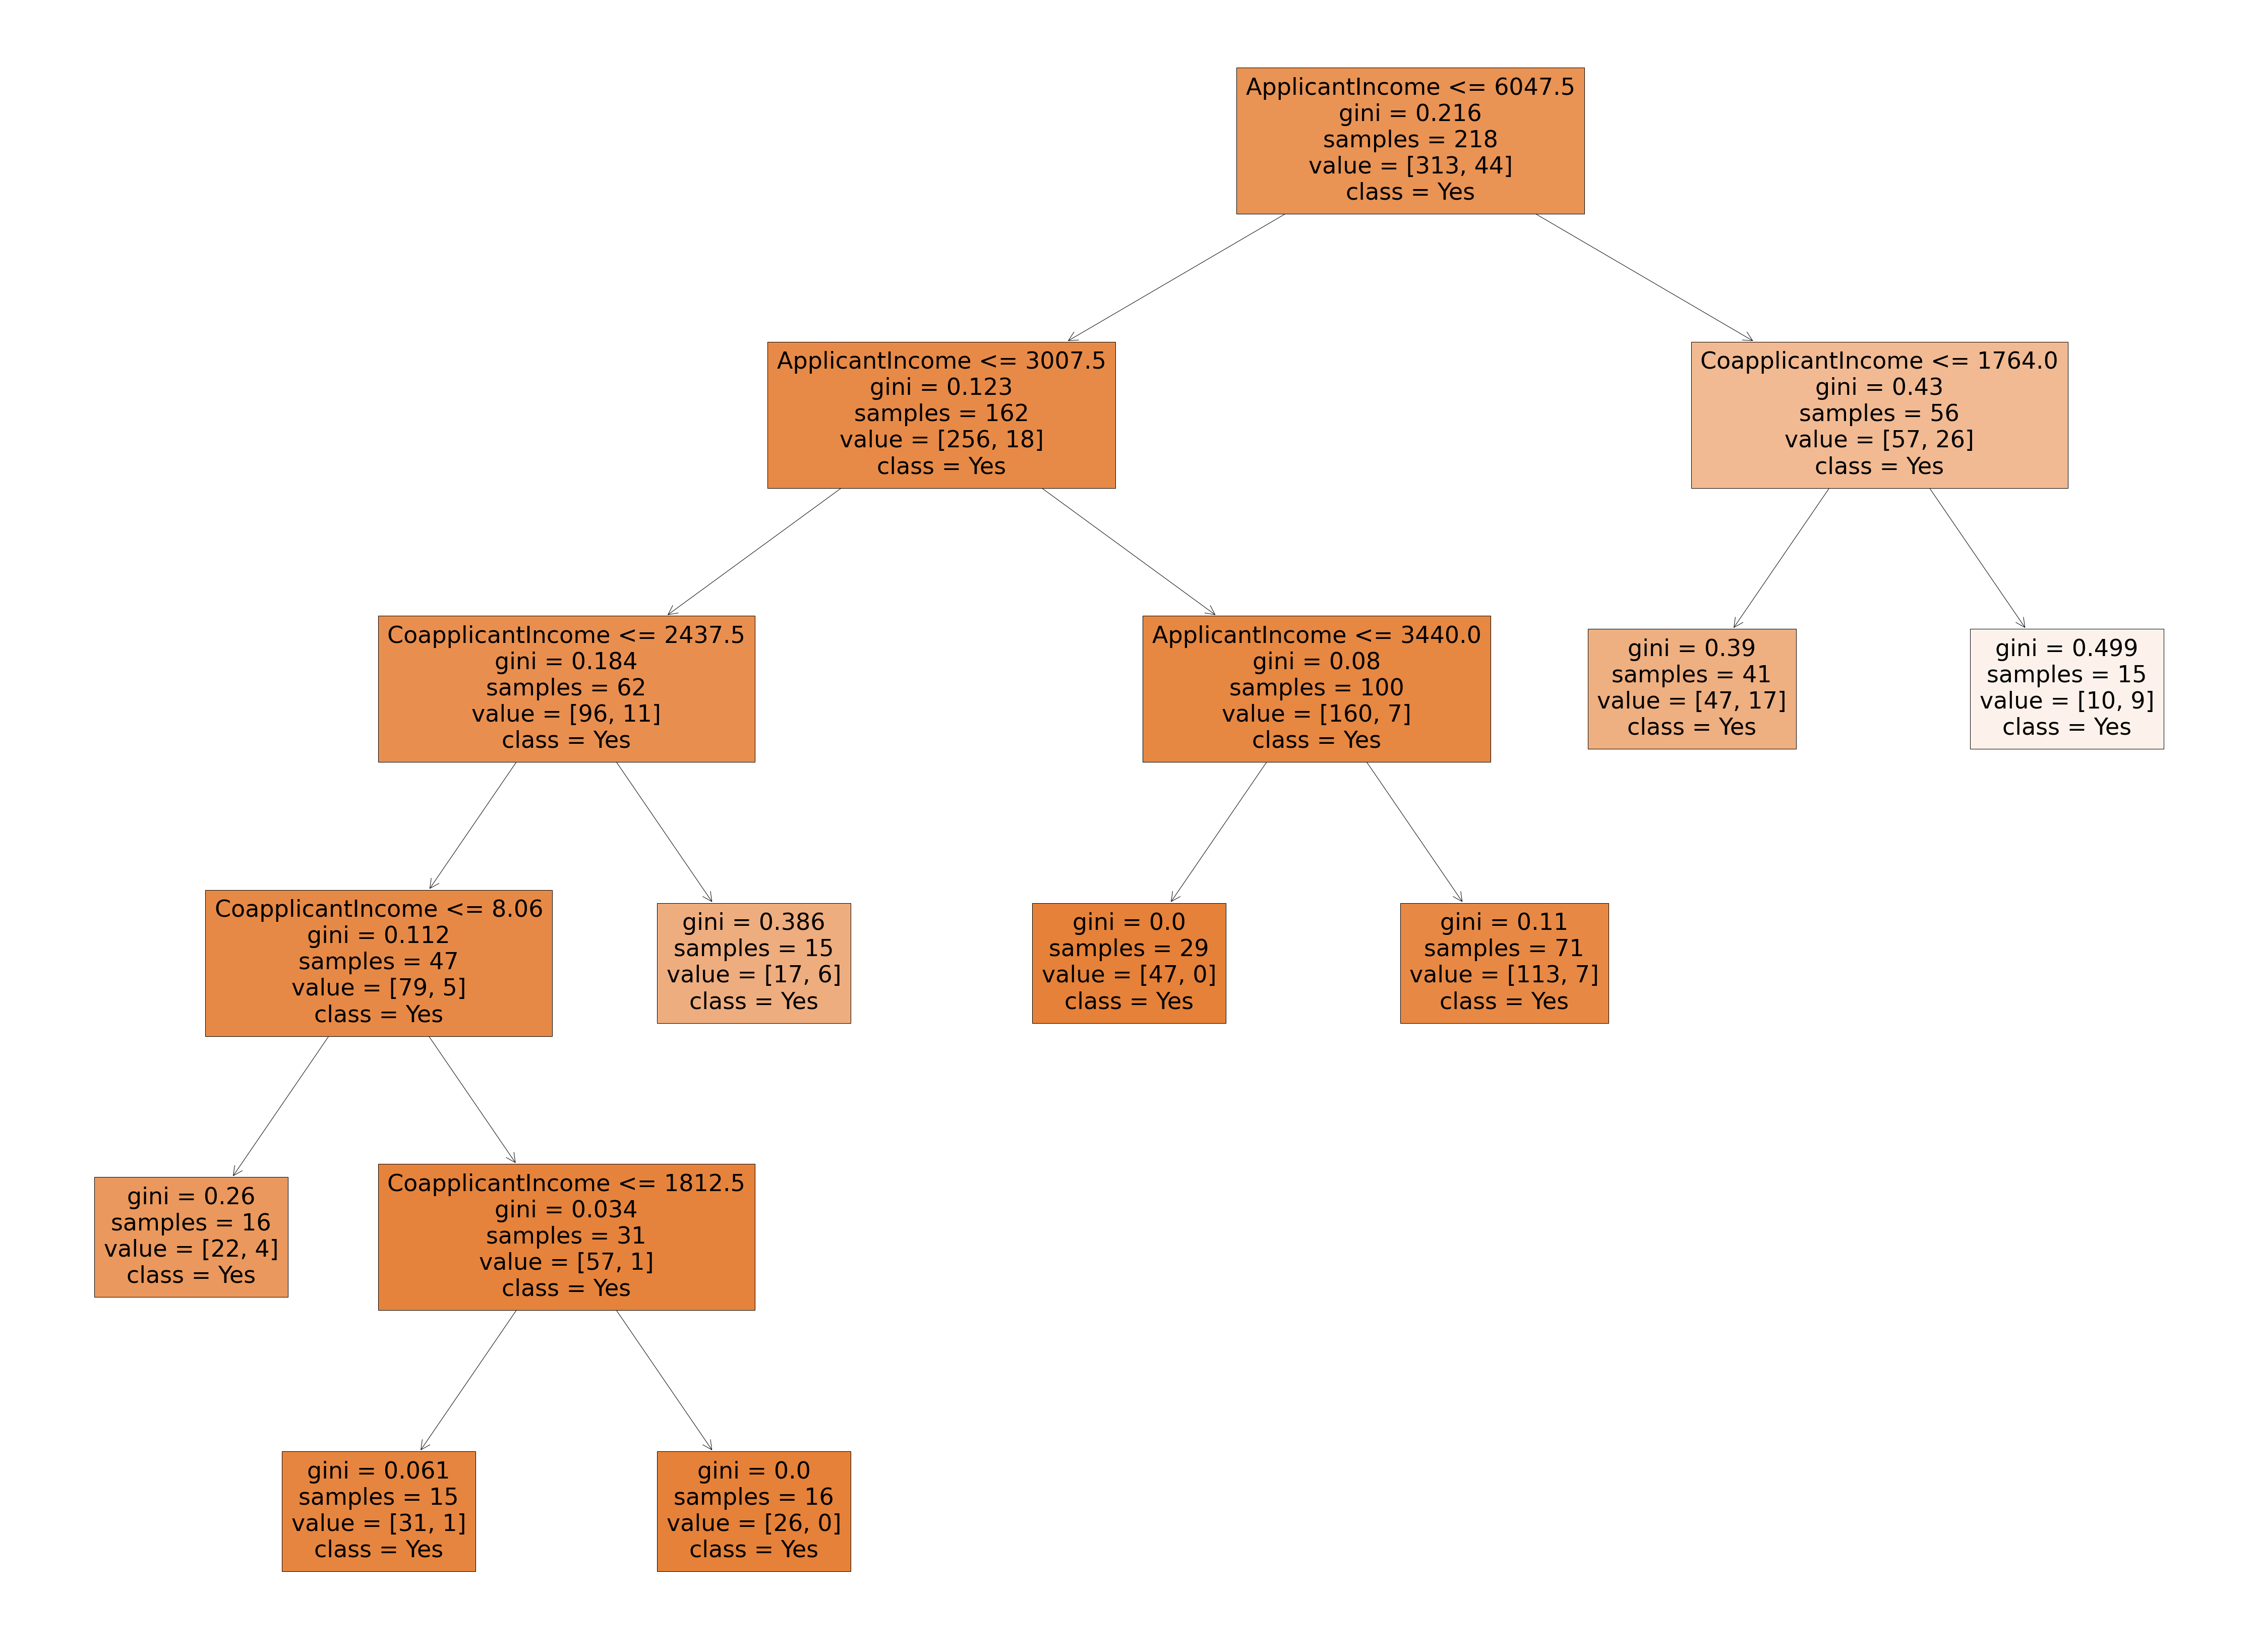

In [158]:
plt.figure(figsize=(80,60))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)

# C9

In [159]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C9_Data.csv")
a

row_id  user_id            timestamp  gate_id
0           0       18  2022-07-29 09:08:54        7
1           1       18  2022-07-29 09:09:54        9
2           2       18  2022-07-29 09:09:54        9
3           3       18  2022-07-29 09:10:06        5
4           4       18  2022-07-29 09:10:08        5
...       ...      ...                  ...      ...
37513   37513        6  2022-12-31 20:38:56       11
37514   37514        6  2022-12-31 20:39:22        6
37515   37515        6  2022-12-31 20:39:23        6
37516   37516        6  2022-12-31 20:39:31        9
37517   37517        6  2022-12-31 20:39:31        9

[37518 rows x 4 columns]

In [160]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37518 entries, 0 to 37517
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   row_id     37518 non-null  int64 
 1   user_id    37518 non-null  int64 
 2   timestamp  37518 non-null  object
 3   gate_id    37518 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.1+ MB


In [163]:
c=a[['row_id','user_id','gate_id']]
c

row_id  user_id  gate_id
0           0       18        7
1           1       18        9
2           2       18        9
3           3       18        5
4           4       18        5
...       ...      ...      ...
37513   37513        6       11
37514   37514        6        6
37515   37515        6        6
37516   37516        6        9
37517   37517        6        9

[37518 rows x 3 columns]

In [167]:
c['gate_id'].value_counts()

 4     8170
 3     5351
 10    4767
 5     4619
 11    4090
 9     3390
 7     3026
 6     1800
 13    1201
 12     698
 15     298
-1       48
 8       48
 1        5
 16       4
 0        2
 14       1
Name: gate_id, dtype: int64

In [165]:
x=c.drop('gate_id',axis=1)
y=c['gate_id']

In [185]:
z={"gate_id":{'4':16,'3':98,'10':45,'5':23,'11':48,'9':15,'7':21,'6':32,'13':29,'12':54,'15':56,'-1':62,'8':51,'1':34,'16':45,'0':67,'14':89}}
c=c.replace(z)
print(c)


       row_id  user_id  gate_id
0           0       18        7
1           1       18        9
2           2       18        9
3           3       18        5
4           4       18        5
...       ...      ...      ...
37513   37513        6       11
37514   37514        6        6
37515   37515        6        6
37516   37516        6        9
37517   37517        6        9

[37518 rows x 3 columns]


In [186]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [187]:
parameters={'max_depth':[5,8,8,15,5],
           'min_samples_leaf':[5,4,1,2,5],
           'n_estimators':[12,2,5,7,33]}

In [188]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 8, 15, 5],
                         'min_samples_leaf': [5, 4, 1, 2, 5],
                         'n_estimators': [12, 2, 5, 7, 33]},
             scoring='accuracy')

In [189]:
grid_search.best_score_

0.22814128638504144

In [190]:
rfc_best=grid_search.best_estimator_

[Text(2746.1393494897957, 2567.0, 'user_id <= 49.5\ngini = 0.87\nsamples = 16875\nvalue = [37, 3, 6, 3764, 5790, 3326, 1282, 2148, 39, 2397\n3411, 2930, 458, 838, 207, 1]\nclass = 5'),
 Text(1475.4260204081631, 2265.0, 'row_id <= 14079.0\ngini = 0.872\nsamples = 14085\nvalue = [23, 3, 6, 2691, 4760, 3061, 962, 1771, 39, 2197\n2889, 2461, 438, 794, 175, 0]\nclass = 5'),
 Text(654.4400510204081, 1963.0, 'user_id <= 16.5\ngini = 0.879\nsamples = 5226\nvalue = [12, 3, 1, 928, 1670, 1202, 381, 676, 8, 679, 966\n813, 322, 474, 41, 0]\nclass = 5'),
 Text(318.1454081632653, 1661.0, 'row_id <= 9350.5\ngini = 0.859\nsamples = 2022\nvalue = [2, 0, 0, 314, 719, 616, 143, 303, 5, 231, 393\n368, 32, 95, 0, 0]\nclass = 5'),
 Text(93.94897959183673, 1359.0, 'row_id <= 48.5\ngini = 0.853\nsamples = 1352\nvalue = [0, 0, 0, 214, 497, 434, 100, 195, 5, 123, 232\n249, 27, 47, 0, 0]\nclass = 5'),
 Text(34.16326530612245, 1057.0, 'user_id <= 2.0\ngini = 0.671\nsamples = 11\nvalue = [0, 0, 0, 0, 0, 7, 0, 6, 0

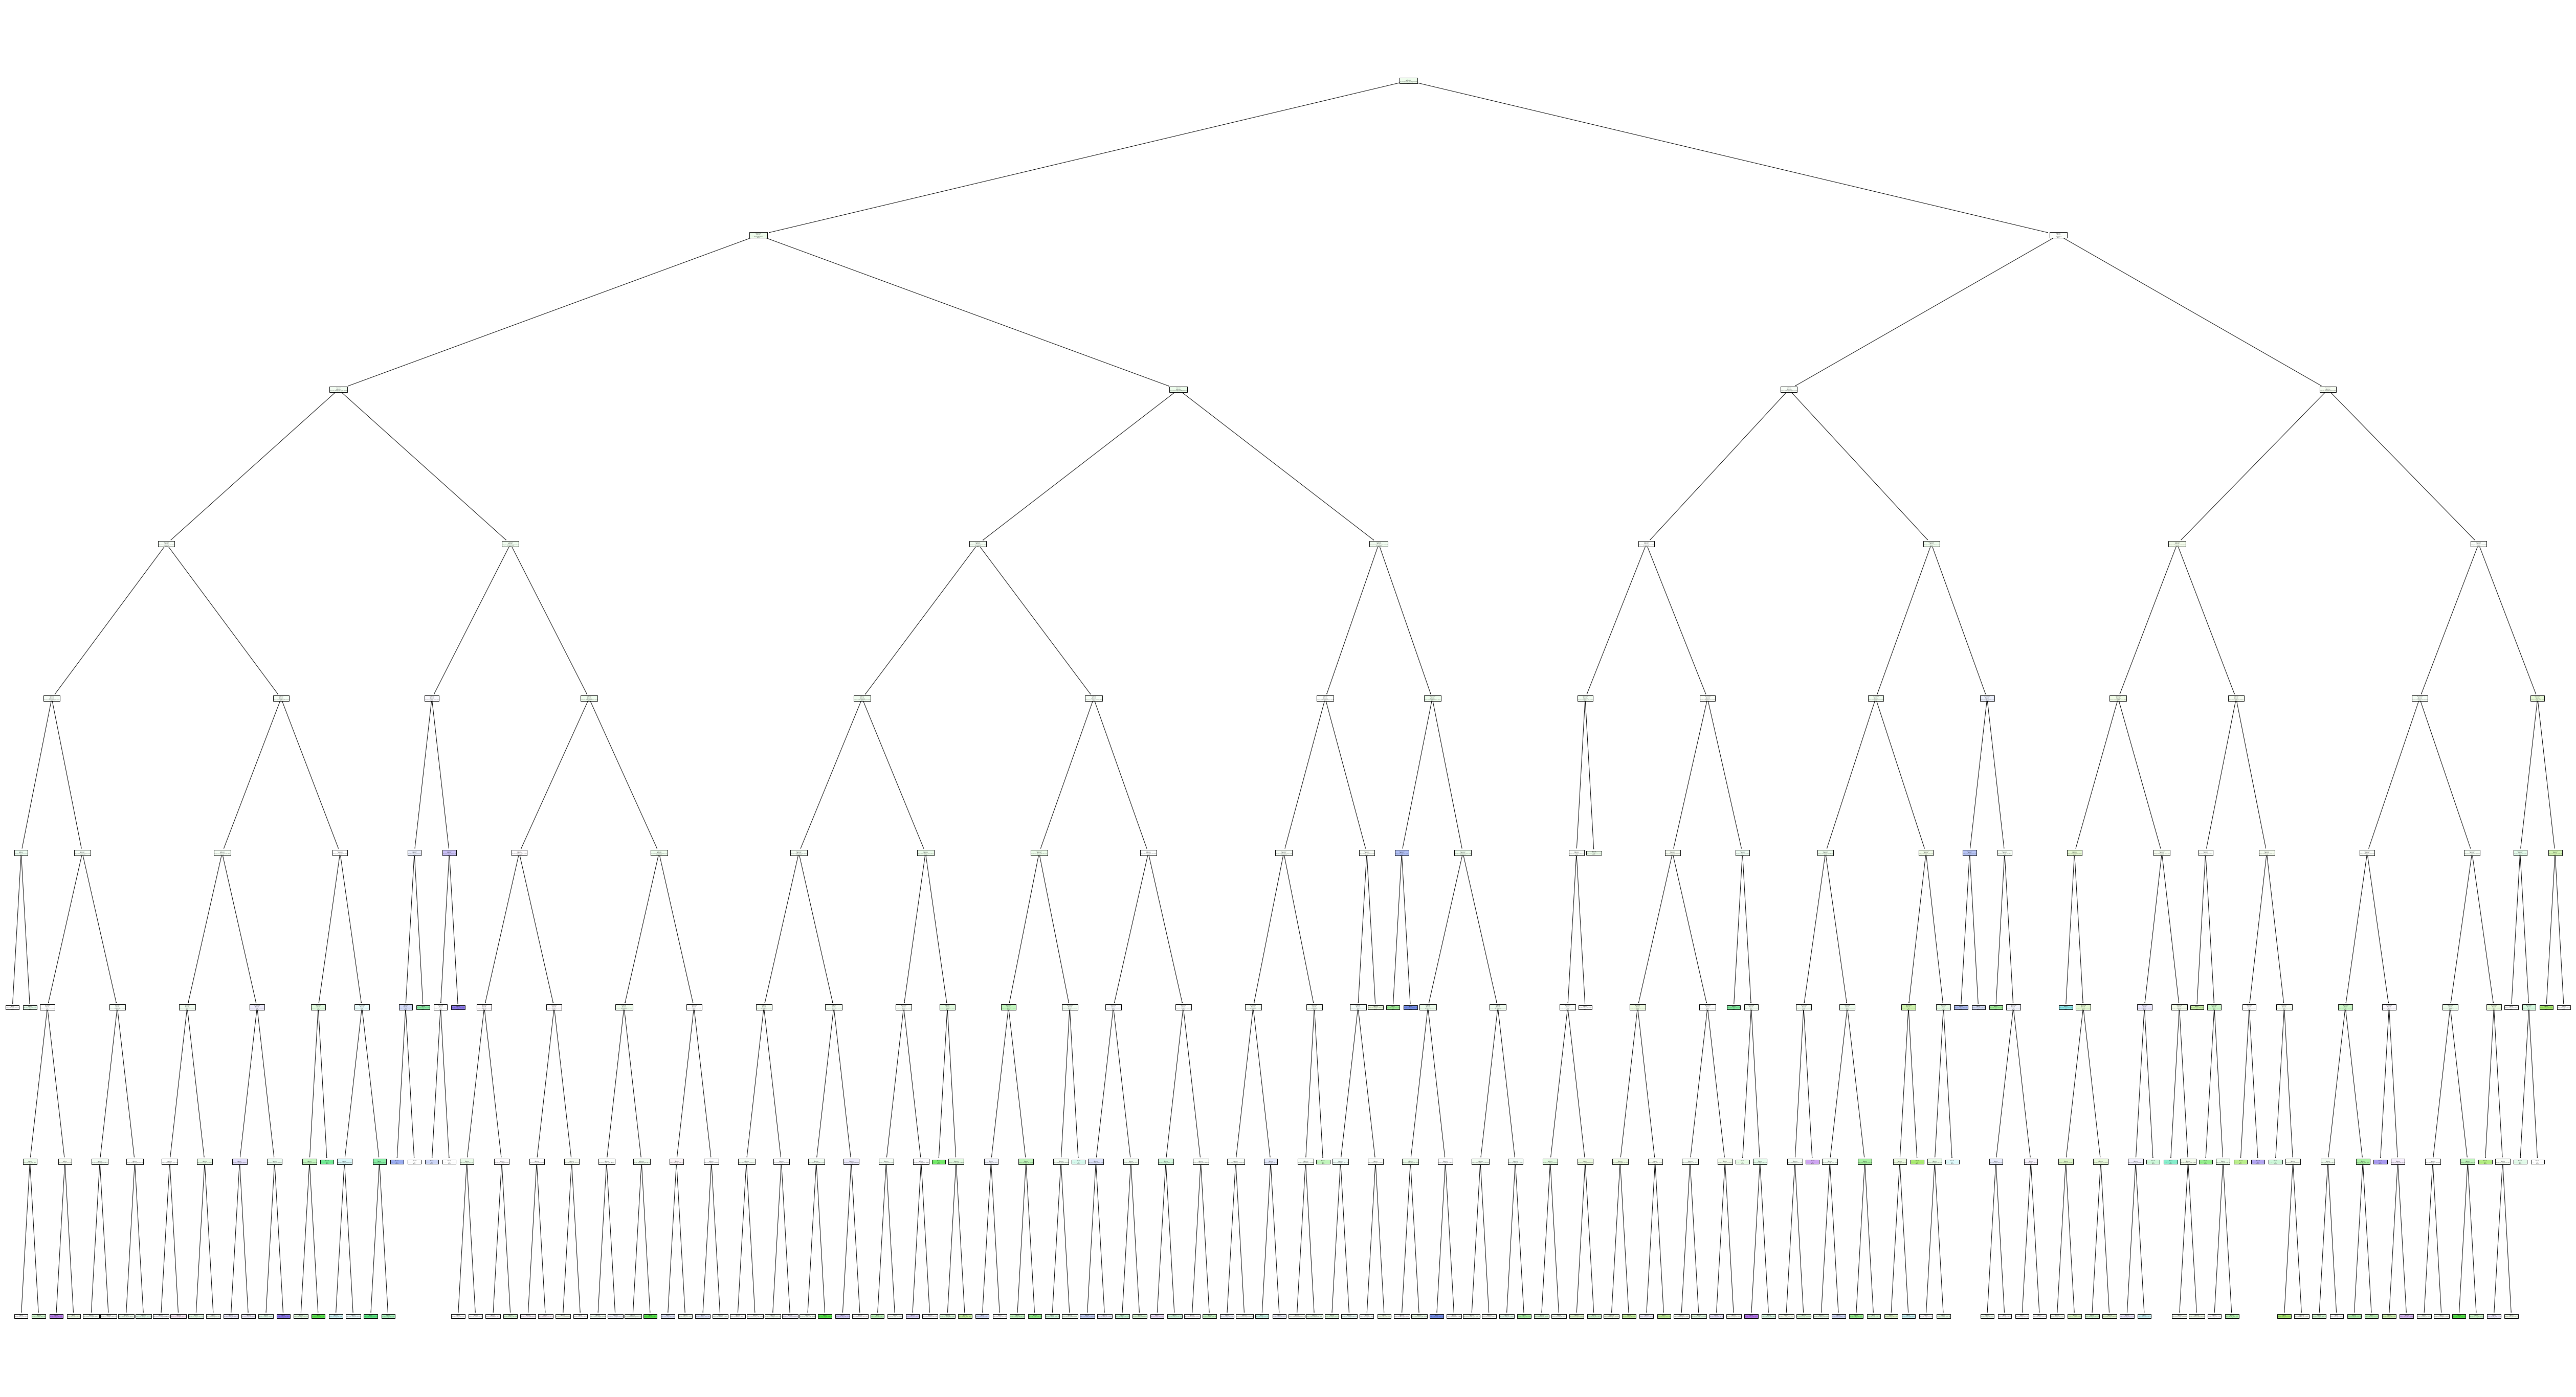

In [192]:
plt.figure(figsize=(90,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17'],filled=True)

# C10

In [195]:
a=pd.read_csv(r"E:\Python Data Science\Documents\C10_loan1.csv")
a

Home Owner Marital Status  Annual Income Defaulted Borrower
0        Yes         Single            125                 No
1         No        Married            100                 No
2         No         Single             70                 No
3        Yes        Married            120                 No
4         No       Divorced             95                Yes
5         No        Married             60                 No
6        Yes       Divorced            220                 No
7         No         Single             85                Yes
8         No        Married             75                 No
9         No         Single             90                Yes

In [198]:
c=a[['Annual Income','Home Owner']]
c

Annual Income Home Owner
0            125        Yes
1            100         No
2             70         No
3            120        Yes
4             95         No
5             60         No
6            220        Yes
7             85         No
8             75         No
9             90         No

In [199]:
c['Home Owner'].value_counts()

No     7
Yes    3
Name: Home Owner, dtype: int64

In [200]:
x=c.drop('Home Owner',axis=1)
y=c['Home Owner']

In [201]:
z={"Home Owner":{'No':32,'Yes':65}}
c=c.replace(z)
print(c)

   Annual Income  Home Owner
0            125          65
1            100          32
2             70          32
3            120          65
4             95          32
5             60          32
6            220          65
7             85          32
8             75          32
9             90          32


In [202]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.710)

m=RandomForestClassifier()
m.fit(x_train,y_train)

RandomForestClassifier()

In [203]:
parameters={'max_depth':[65,98,8,15,58],
           'min_samples_leaf':[45,54,84,74,45],
           'n_estimators':[12,23,48,59,17]}

In [204]:
grid_search=GridSearchCV(estimator=m,param_grid=parameters,cv=2,scoring='accuracy')
grid_search.fit(x_train,y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [65, 98, 8, 15, 58],
                         'min_samples_leaf': [45, 54, 84, 74, 45],
                         'n_estimators': [12, 23, 48, 59, 17]},
             scoring='accuracy')

In [205]:
grid_search.best_score_

0.7083333333333333

In [206]:
rfc_best=grid_search.best_estimator_

[Text(2511.0, 1359.0, 'gini = 0.49\nsamples = 5\nvalue = [3, 4]\nclass = No')]

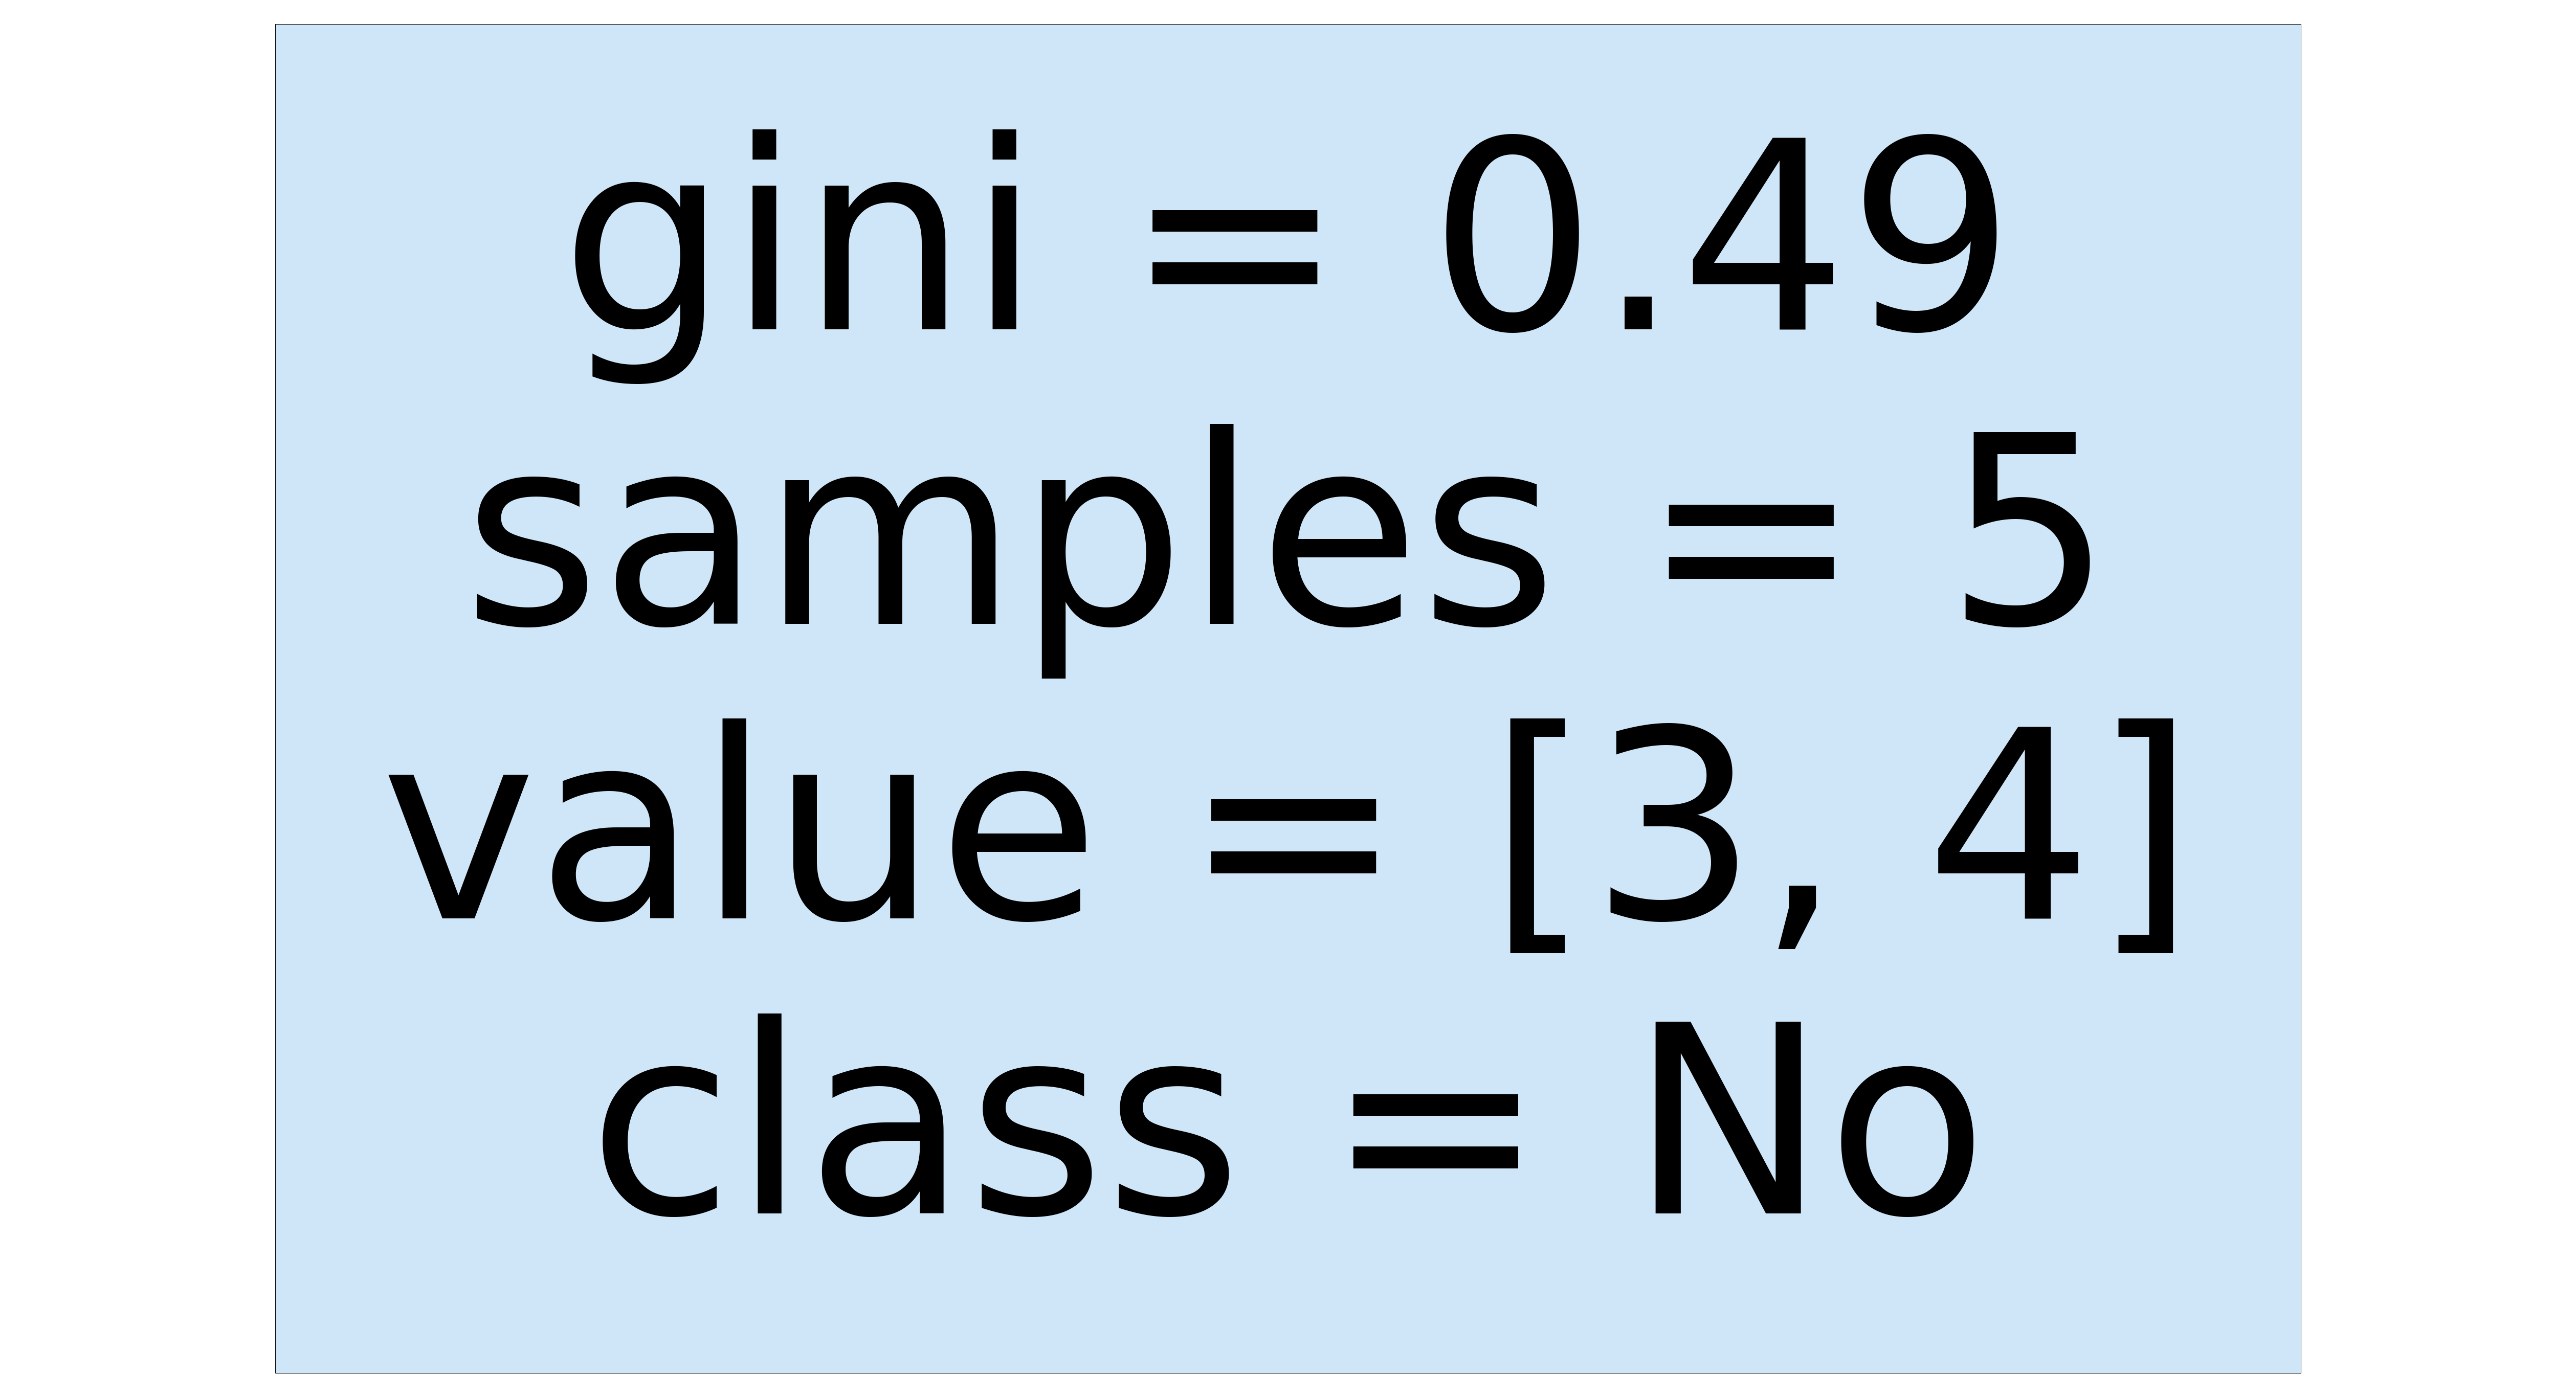

In [207]:
plt.figure(figsize=(90,50))
plot_tree(rfc_best.estimators_[5],feature_names=x.columns,class_names=['Yes','No'],filled=True)